In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
#df = pd.read_csv('../data/cleaned_311.csv')
df = pd.read_csv('../../data/311_cleaned_v2.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_17616\215079703.py:8: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/311_cleaned_v2.csv')


In [2]:
df.head()

,case_enquiry_id,open_dt,closed_dt,on_time,case_status,closure_reason,subject,reason,type,queue,...,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,ONTIME,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,...,Employee Generated,0.148900,2011,6,30,21,32,3,181,2
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,...,Self Service,0.162639,2011,6,30,22,18,3,181,2
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,...,Self Service,31.537292,2011,6,30,22,28,3,181,2
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),...,Self Service,21.548576,2011,6,30,23,3,3,181,2
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,ONTIME,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,...,Constituent Call,0.125081,2011,6,30,23,12,3,181,2


In [3]:
df.isnull().sum()

case_enquiry_id                        0
open_dt                                0
closed_dt                         195432
on_time                                0
case_status                            0
closure_reason                         0
subject                                0
reason                                 0
type                                   0
queue                                  0
department                             0
fire_district                          0
pwd_district                           0
city_council_district                  0
police_district                        0
neighborhood                           0
neighborhood_services_district         0
ward                                   0
precinct                               0
location_zipcode                       0
latitude                           44020
longitude                          44020
source                                 0
resolution_time                   195432
open_year       

In [4]:
# drop na
df.dropna(inplace=True)
df.isnull().sum()

case_enquiry_id                   0
open_dt                           0
closed_dt                         0
on_time                           0
case_status                       0
closure_reason                    0
subject                           0
reason                            0
type                              0
queue                             0
department                        0
fire_district                     0
pwd_district                      0
city_council_district             0
police_district                   0
neighborhood                      0
neighborhood_services_district    0
ward                              0
precinct                          0
location_zipcode                  0
latitude                          0
longitude                         0
source                            0
resolution_time                   0
open_year                         0
open_month                        0
open_day                          0
open_hour                   

In [5]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# Resolution Time Exploration

In [6]:
df.resolution_time.describe()

count   2484497.00
mean         31.28
std         159.18
min           0.00
25%           0.06
50%           0.75
75%           5.71
max        4417.96
Name: resolution_time, dtype: float64

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

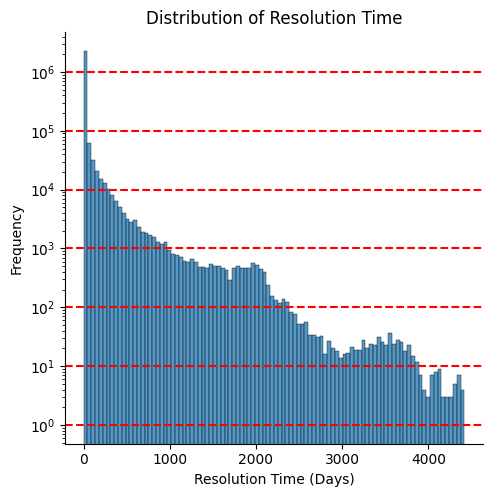

In [7]:
# Plot distribution of resolution time
plt.figure(figsize=(12,8))
sns.displot(df.resolution_time, bins=100)
plt.title('Distribution of Resolution Time')
plt.xlabel('Resolution Time (Days)')
plt.ylabel('Frequency')
# log scale on x-axis and y-axis
plt.yscale('log')
# Y scale max value will be upper bounded by the max value in the data
y_max = df.shape[0]
# GET log 10 of y_max
y_max_log = np.log10(y_max)
# round up to nearest integer
y_max_log = np.ceil(y_max_log)
for i in range(int(y_max_log)):
    # plot horizontal lines at each power of 10
    plt.axhline(y=10**i, color='r', linestyle='--')
plt.show()

Seems that around 50% of time issues are resolved within a day.

In [4]:
df['longitude_rounded'] = df.longitude.round(0)
df['latitude_rounded'] = df.latitude.round(0)

# Drop rows with latitude rounded to 0
df = df[df.latitude_rounded != 0]

# Drop rows with longitude rounded to 0
df = df[df.longitude_rounded != 0]

df.shape

(2484489, 34)

<Figure size 1000x1000 with 0 Axes>

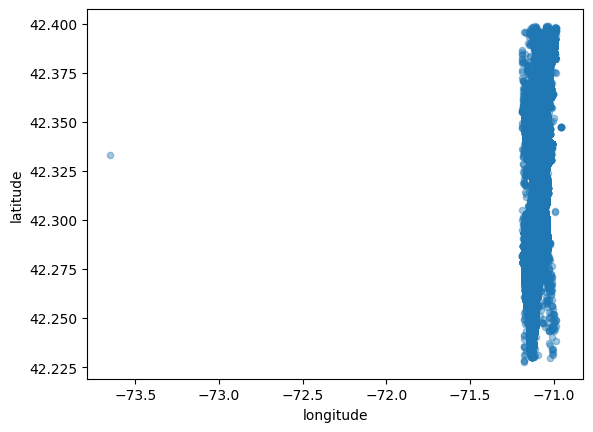

In [9]:
# plot a map of the latitudes and longitudes
plt.figure(figsize=(10,10))
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

In [7]:
# Drop the one request with a longitude less that -73
df = df[df.longitude > -73]

In [6]:
# replot
plt.figure(figsize=(10,10))
df.plot(kind="scatter", x="latitude", y="longitude", alpha=0.4)
plt.show()

: 

In [ ]:
# Calculate the average longitude and latitude for downtown
mean_boston_longitude = df[df['neighborhood'] == 'Boston'].longitude.mean()
mean_boston_latitude = df[df['neighborhood'] == 'Boston'].latitude.mean()

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Add new feature defining distance from Boston
df['distance_from_boston'] = df.apply(lambda row: haversine(mean_boston_latitude, mean_boston_longitude, row['latitude'], row['longitude']), axis=1)

In [ ]:
df['distance_from_boston'].describe()

count   2484488.00
mean          4.82
std           3.15
min           0.06
25%           2.16
50%           4.17
75%           6.93
max          16.61
Name: distance_from_boston, dtype: float64

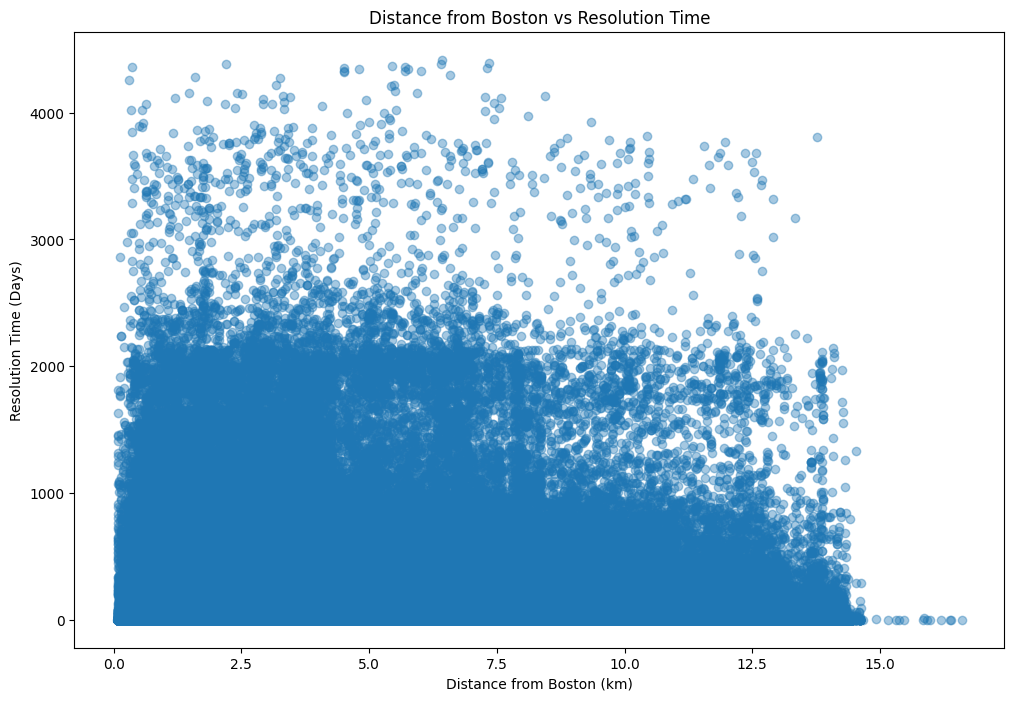

In [14]:
# Scatter plot of distance from Boston vs resolution time
plt.figure(figsize=(12,8))
plt.scatter(df.distance_from_boston, df.resolution_time, alpha=0.4)
plt.title('Distance from Boston vs Resolution Time')
plt.xlabel('Distance from Boston (km)')
plt.ylabel('Resolution Time (Days)')
plt.show()

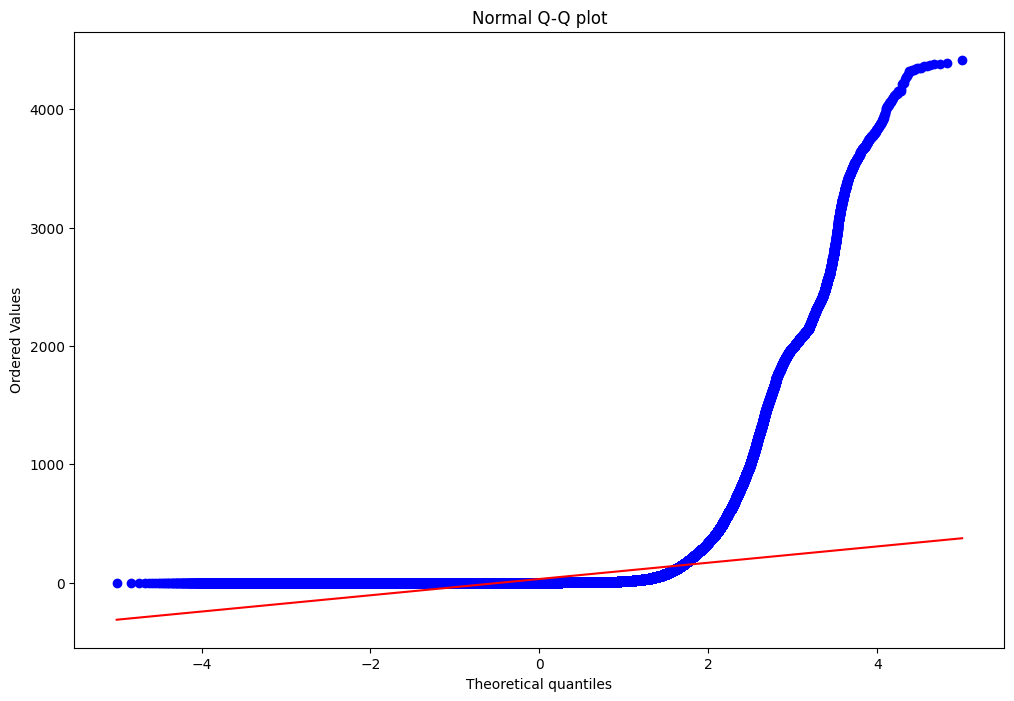

In [15]:
import scipy.stats as stats

# Q-Q plot of distance from Boston
plt.figure(figsize=(12,8))
stats.probplot(df.resolution_time, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


In [7]:
# log transform resolution time
df['log_resolution_time'] = np.log(df.resolution_time + 0.0000001)


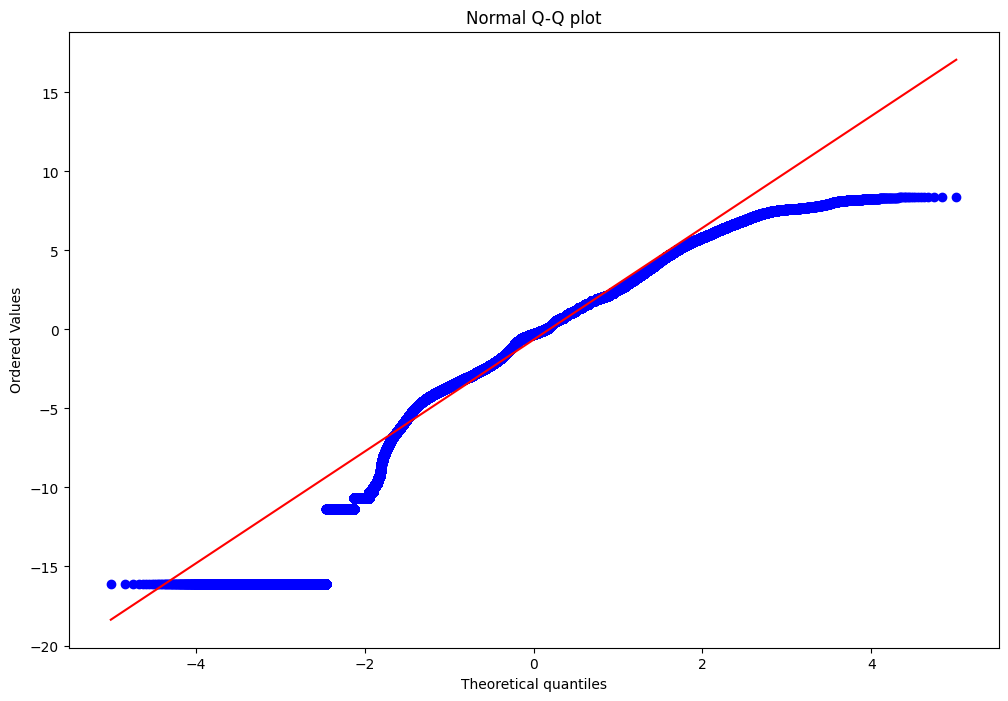

In [17]:
# Q-Q plot of log transformed resolution time
plt.figure(figsize=(12,8))
stats.probplot(df.log_resolution_time, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [8]:
sv = pd.read_csv('../../data/social_vulnerability.csv')

In [9]:
sv.head()

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.87,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.00,6036.19
1,2,25025010404,1472713.92,33.81,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.38,2176.59
2,3,25025010801,1376667.12,31.60,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.91,2542.04
3,4,25025010702,3228780.12,74.12,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.01,3224.57
4,5,25025010204,2741497.18,62.94,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.24,3143.61


In [10]:
sv.Name.unique()

array(['Mission Hill', 'Fenway', 'Back Bay', 'Allston', 'Brighton',
       'Jamaica Plain', 'Roslindale', 'Hyde Park', 'West Roxbury',
       'Mattapan', 'Dorchester', 'East Boston', 'North End', 'West End',
       'Longwood Medical Area', 'Roxbury', 'South Boston Waterfront',
       'Charlestown', 'South End', 'Bay Village', 'Leather District',
       'South Boston', 'Harbor Islands'], dtype=object)

In [11]:
df.neighborhood.unique()

array(['Greater Mattapan', 'Roslindale', 'West Roxbury', 'Hyde Park',
       'Dorchester', 'Jamaica Plain',
       'Fenway / Kenmore / Audubon Circle / Longwood', 'Roxbury',
       'South Boston / South Boston Waterfront', 'Back Bay',
       'Allston / Brighton', 'East Boston',
       'Downtown / Financial District', 'Boston', 'Charlestown',
       'Beacon Hill', 'South End', 'Mission Hill', 'Allston', 'Brighton',
       'South Boston', 'Mattapan', 'No Neighborhood', 'Chestnut Hill'],
      dtype=object)

In [12]:
def compare(df=df, sv=sv):
    df_neighborhoods = df.neighborhood.unique()
    sv_neighborhoods = sv.Name.unique()

    missing_neighborhoods = list(set(df_neighborhoods) - set(sv_neighborhoods))
    
    return missing_neighborhoods

compare()

['South Boston / South Boston Waterfront',
 'Boston',
 'Greater Mattapan',
 'Fenway / Kenmore / Audubon Circle / Longwood',
 'Allston / Brighton',
 'Beacon Hill',
 'Chestnut Hill',
 'No Neighborhood',
 'Downtown / Financial District']

In [13]:
# merge some neighborhoods in df
df_copy = df.copy(deep=True)

In [14]:
# Map Greater Mattapan to Mattapan
df_copy['neighborhood'] = df_copy['neighborhood'].replace(['Greater Mattapan'], 'Mattapan')

In [15]:
compare(df_copy)

['South Boston / South Boston Waterfront',
 'Boston',
 'Fenway / Kenmore / Audubon Circle / Longwood',
 'Allston / Brighton',
 'Beacon Hill',
 'Chestnut Hill',
 'No Neighborhood',
 'Downtown / Financial District']

In [16]:
sv.Name.unique()

array(['Mission Hill', 'Fenway', 'Back Bay', 'Allston', 'Brighton',
       'Jamaica Plain', 'Roslindale', 'Hyde Park', 'West Roxbury',
       'Mattapan', 'Dorchester', 'East Boston', 'North End', 'West End',
       'Longwood Medical Area', 'Roxbury', 'South Boston Waterfront',
       'Charlestown', 'South End', 'Bay Village', 'Leather District',
       'South Boston', 'Harbor Islands'], dtype=object)

In [17]:
df_copy.neighborhood.unique()

array(['Mattapan', 'Roslindale', 'West Roxbury', 'Hyde Park',
       'Dorchester', 'Jamaica Plain',
       'Fenway / Kenmore / Audubon Circle / Longwood', 'Roxbury',
       'South Boston / South Boston Waterfront', 'Back Bay',
       'Allston / Brighton', 'East Boston',
       'Downtown / Financial District', 'Boston', 'Charlestown',
       'Beacon Hill', 'South End', 'Mission Hill', 'Allston', 'Brighton',
       'South Boston', 'No Neighborhood', 'Chestnut Hill'], dtype=object)

In [18]:
# sv Fenway goes to Fenway / Kenmore / Audubon Circle / Longwood group
sv_copy = sv.copy(deep=True)

In [19]:
sv_copy['Name'] = sv_copy['Name'].replace(['Fenway'], 'Fenway / Kenmore / Audubon Circle / Longwood')

In [20]:
compare(df_copy, sv_copy)

['South Boston / South Boston Waterfront',
 'Boston',
 'Allston / Brighton',
 'Beacon Hill',
 'Chestnut Hill',
 'No Neighborhood',
 'Downtown / Financial District']

In [21]:
print(f'DF_NEIGHBORHOODS:{chr(10)}{chr(10).join(df_copy.neighborhood.unique())}')
print('-'*100)
print('-'*100)
print(f'SV_NEIGHBORHOODS:{chr(10)}{chr(10).join(sv_copy.Name.unique())}')

DF_NEIGHBORHOODS:
Mattapan
Roslindale
West Roxbury
Hyde Park
Dorchester
Jamaica Plain
Fenway / Kenmore / Audubon Circle / Longwood
Roxbury
South Boston / South Boston Waterfront
Back Bay
Allston / Brighton
East Boston
Downtown / Financial District
Boston
Charlestown
Beacon Hill
South End
Mission Hill
Allston
Brighton
South Boston
No Neighborhood
Chestnut Hill
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
SV_NEIGHBORHOODS:
Mission Hill
Fenway / Kenmore / Audubon Circle / Longwood
Back Bay
Allston
Brighton
Jamaica Plain
Roslindale
Hyde Park
West Roxbury
Mattapan
Dorchester
East Boston
North End
West End
Longwood Medical Area
Roxbury
South Boston Waterfront
Charlestown
South End
Bay Village
Leather District
South Boston
Harbor Islands


In [22]:
# South Boston Waterfront in SV goes to South Boston / South Boston Waterfront in df
sv_copy['Name'] = sv_copy['Name'].replace(['South Boston Waterfront'], 'South Boston / South Boston Waterfront')

In [23]:
compare(df_copy, sv_copy)

['Boston',
 'Allston / Brighton',
 'Beacon Hill',
 'Chestnut Hill',
 'No Neighborhood',
 'Downtown / Financial District']

In [24]:
# merge Allston and Brighton in sv
sv_copy['Name'] = sv_copy['Name'].replace(['Allston'], 'Allston / Brighton')
sv_copy['Name'] = sv_copy['Name'].replace(['Brighton'], 'Allston / Brighton')

In [25]:
compare(df_copy, sv_copy)

['Allston',
 'Boston',
 'Brighton',
 'Beacon Hill',
 'Chestnut Hill',
 'No Neighborhood',
 'Downtown / Financial District']

In [26]:
# merge Allston and Brighton in df
df_copy['neighborhood'] = df_copy['neighborhood'].replace(['Allston'], 'Allston / Brighton')
df_copy['neighborhood'] = df_copy['neighborhood'].replace(['Brighton'], 'Allston / Brighton')

In [27]:
compare(df_copy, sv_copy)

['Boston',
 'Beacon Hill',
 'Chestnut Hill',
 'No Neighborhood',
 'Downtown / Financial District']

In [28]:
sv.Name.unique()

array(['Mission Hill', 'Fenway', 'Back Bay', 'Allston', 'Brighton',
       'Jamaica Plain', 'Roslindale', 'Hyde Park', 'West Roxbury',
       'Mattapan', 'Dorchester', 'East Boston', 'North End', 'West End',
       'Longwood Medical Area', 'Roxbury', 'South Boston Waterfront',
       'Charlestown', 'South End', 'Bay Village', 'Leather District',
       'South Boston', 'Harbor Islands'], dtype=object)

In [29]:
# merge Beacon Hill with Back Bay 
df_copy['neighborhood'] = df_copy['neighborhood'].replace(['Beacon Hill'], 'Back Bay / Beacon Hill')
df_copy['neighborhood'] = df_copy['neighborhood'].replace(['Back Bay'], 'Back Bay / Beacon Hill')
sv_copy['Name'] = sv_copy['Name'].replace(['Back Bay'], 'Back Bay / Beacon Hill')

In [30]:
compare(df_copy, sv_copy)

['Chestnut Hill', 'Boston', 'No Neighborhood', 'Downtown / Financial District']

In [31]:
df[df.neighborhood == 'Boston'].shape

(75466, 32)

In [32]:
df[df.neighborhood=='No Neighborhood'].shape

(13356, 32)

In [33]:
df[df.neighborhood=='Downtown / Financial District'].shape

(145697, 32)

In [34]:
df[df.neighborhood=='Chestnut Hill'].shape

(136, 32)

In [35]:
sv_copy.Name.unique()

array(['Mission Hill', 'Fenway / Kenmore / Audubon Circle / Longwood',
       'Back Bay / Beacon Hill', 'Allston / Brighton', 'Jamaica Plain',
       'Roslindale', 'Hyde Park', 'West Roxbury', 'Mattapan',
       'Dorchester', 'East Boston', 'North End', 'West End',
       'Longwood Medical Area', 'Roxbury',
       'South Boston / South Boston Waterfront', 'Charlestown',
       'South End', 'Bay Village', 'Leather District', 'South Boston',
       'Harbor Islands'], dtype=object)

In [36]:
df_copy.neighborhood.unique()

array(['Mattapan', 'Roslindale', 'West Roxbury', 'Hyde Park',
       'Dorchester', 'Jamaica Plain',
       'Fenway / Kenmore / Audubon Circle / Longwood', 'Roxbury',
       'South Boston / South Boston Waterfront', 'Back Bay / Beacon Hill',
       'Allston / Brighton', 'East Boston',
       'Downtown / Financial District', 'Boston', 'Charlestown',
       'South End', 'Mission Hill', 'South Boston', 'No Neighborhood',
       'Chestnut Hill'], dtype=object)

In [37]:
set(sv_copy.Name.unique()) - set(df_copy.neighborhood.unique())

{'Bay Village',
 'Harbor Islands',
 'Leather District',
 'Longwood Medical Area',
 'North End',
 'West End'}

Drop Harbor

Leather District goes into Chinatown / Bay Village / Downtown / Fire District / Leather District

Longwood Medical Area goes into Fenway / Kenmore / Audubon Circle / Longwood



In [38]:
# Longwood Medical Area goes into Fenway / Kenmore / Audubon Circle / Longwood 
sv_copy['Name'] = sv_copy['Name'].replace(['Longwood Medical Area'], 'Fenway / Kenmore / Audubon Circle / Longwood')

In [39]:
print(set(sv_copy.Name.unique()) - set(df_copy.neighborhood.unique()))
print(set(df_copy.neighborhood.unique()) - set(sv_copy.Name.unique()))

{'Bay Village', 'North End', 'West End', 'Harbor Islands', 'Leather District'}
{'Chestnut Hill', 'Boston', 'No Neighborhood', 'Downtown / Financial District'}


In [40]:
# drop the columns in df that are not in sv
is_in_sv = sv_copy.Name.unique()

df_copy = df_copy[df_copy['neighborhood'].isin(is_in_sv)]

In [41]:
is_in_df = df_copy.neighborhood.unique()

sv_copy = sv_copy[sv_copy['Name'].isin(is_in_df)]

In [42]:
# rename Name in sv to neighborhood
sv_copy.rename(columns={'Name':'neighborhood'}, inplace=True)

In [43]:
sv_copy.neighborhood.unique()

array(['Mission Hill', 'Fenway / Kenmore / Audubon Circle / Longwood',
       'Back Bay / Beacon Hill', 'Allston / Brighton', 'Jamaica Plain',
       'Roslindale', 'Hyde Park', 'West Roxbury', 'Mattapan',
       'Dorchester', 'East Boston', 'Roxbury',
       'South Boston / South Boston Waterfront', 'Charlestown',
       'South End', 'South Boston'], dtype=object)

In [44]:
sv_copy = sv_copy.groupby('neighborhood').sum()

In [45]:
sv_copy.head()

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length
neighborhood,,,,,,,,,,,,,,,
Allston / Brighton,1122,400400007531,105838122.29,2429.71,68413,30966,5902,4417,5991,20367,26358,22779,26768.65,18015284.37,84682.25
Back Bay / Beacon Hill,597,275277067915,34093613.71,782.68,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5803906.99,67191.05
Charlestown,821,150150242402,37683440.08,865.09,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6420147.65,47678.44
Dorchester,1849,475477636009,131273458.29,3013.62,69695,27507,9819,17424,6535,22749,29284,50778,25010.76,22311203.25,115494.08
East Boston,1702,350353501405,149438025.35,3430.63,40517,15857,5180,8665,4147,13698,17845,25459,14824.60,25455690.03,106008.78


In [46]:
# remove FID, GEOID10
sv_copy.drop(columns=['FID', 'GEOID10'], inplace=True)
sv_copy.head(-1)

,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length
neighborhood,,,,,,,,,,,,,
Allston / Brighton,105838122.29,2429.71,68413,30966,5902,4417,5991,20367,26358,22779,26768.65,18015284.37,84682.25
Back Bay / Beacon Hill,34093613.71,782.68,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5803906.99,67191.05
Charlestown,37683440.08,865.09,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6420147.65,47678.44
Dorchester,131273458.29,3013.62,69695,27507,9819,17424,6535,22749,29284,50778,25010.76,22311203.25,115494.08
East Boston,149438025.35,3430.63,40517,15857,5180,8665,4147,13698,17845,25459,14824.60,25455690.03,106008.78
Fenway / Kenmore / Audubon Circle / Longwood,29508800.94,677.43,31999,9659,1447,571,507,6867,7374,11288,11904.82,5022871.18,30384.20
Hyde Park,55832348.20,1281.73,16585,6592,2117,3256,2219,2683,4902,11132,6412.46,9473515.59,33527.34
Jamaica Plain,116395432.10,2672.07,42251,18844,4570,7300,4381,12985,17366,22247,16600.57,19789667.76,92369.49
Mattapan,68349210.47,1569.08,33103,13517,5605,8859,4073,9531,13604,28276,12396.87,11607701.07,48622.47


In [47]:
# merge
df_copy = df_copy.merge(sv_copy, how='left', on='neighborhood')

In [48]:
df_copy.to_csv('../../data/merged_311.csv', index=False)

In [49]:
df_copy.head()

,case_enquiry_id,open_dt,closed_dt,on_time,case_status,closure_reason,subject,reason,type,queue,department,fire_district,pwd_district,city_council_district,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_zipcode,latitude,longitude,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,ONTIME,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,8,07,3,B3,Mattapan,7,Ward 17,1714,2126,42.27,-71.08,Employee Generated,0.15,2011,6,30,21,32,3,181,2,68349210.47,1569.08,33103,13517,5605,8859,4073,9531,13604,28276,12396.87,11607701.07,48622.47
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,12,06,5,E5,Roslindale,10,Ward 20,2008,2131,42.28,-71.14,Self Service,0.16,2011,6,30,22,18,3,181,2,232257149.06,5331.89,60973,25153,7286,13324,8231,11249,19480,33106,24029.32,39447500.43,136415.60
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,-1,06,6,E5,West Roxbury,12,Ward 20,2017,2132,42.30,-71.17,Self Service,31.54,2011,6,30,22,28,3,181,2,123894262.72,2844.22,22952,10180,2580,4758,3632,3622,7254,9121,9078.90,21037074.21,52799.51
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,12,08,5,E18,Hyde Park,10,Ward 18,1816,2136,42.25,-71.12,Self Service,21.55,2011,6,30,23,3,3,181,2,55832348.20,1281.73,16585,6592,2117,3256,2219,2683,4902,11132,6412.46,9473515.59,33527.34
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,ONTIME,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,7,03,3,C11,Dorchester,7,Ward 13,1309,2125,42.31,-71.06,Constituent Call,0.13,2011,6,30,23,12,3,181,2,131273458.29,3013.62,69695,27507,9819,17424,6535,22749,29284,50778,25010.76,22311203.25,115494.08


In [50]:
checkpoint = df_copy.copy(deep=True)

In [88]:
df_copy = checkpoint.copy(deep=True)

In [89]:
# normalize OlderAdult, TotChild, POC2, LEP, Low_to_No, TotDis, MedIllnes, POP100_RE, by area in sqft and HU100_RE by area in acres
# df_copy['OlderAdult'] = df_copy['OlderAdult'] / df_copy['AREA_SQFT']
# df_copy['TotChild'] = df_copy['TotChild'] / df_copy['AREA_SQFT']
# df_copy['POC2'] = df_copy['POC2'] / df_copy['AREA_SQFT']
# df_copy['LEP'] = df_copy['LEP'] / df_copy['AREA_SQFT']
# df_copy['Low_to_No'] = df_copy['Low_to_No'] / df_copy['AREA_SQFT']
# df_copy['TotDis'] = df_copy['TotDis'] / df_copy['AREA_SQFT']
# df_copy['MedIllnes'] = df_copy['MedIllnes'] / df_copy['AREA_SQFT']
df_copy['POP_PER_SQFT'] = df_copy['POP100_RE'] / df_copy['AREA_SQFT']
df_copy['HU_PER_ACRE'] = df_copy['HU100_RE'] / df_copy['AREA_ACRES']
 

In [131]:
def plot(x,y,xlabel,ylabel,title):
    plt.figure(figsize=(12,8))
    plt.scatter(x,y, alpha=0.4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for i, txt in enumerate(df_copy.neighborhood.unique()):
        plt.annotate(txt, (x[i], y[i]))

    plt.show()

def plot_with_lr(x,y,xlabel,ylabel,title):
    plt.figure(figsize=(12,8))
    plt.scatter(x,y, alpha=0.4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # linear regression
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")

    for i, txt in enumerate(df_copy.neighborhood.unique()):
        plt.annotate(txt, (x[i], y[i]))
        
    plt.show()

In [105]:
x = df_copy.groupby('neighborhood')['resolution_time'].median()

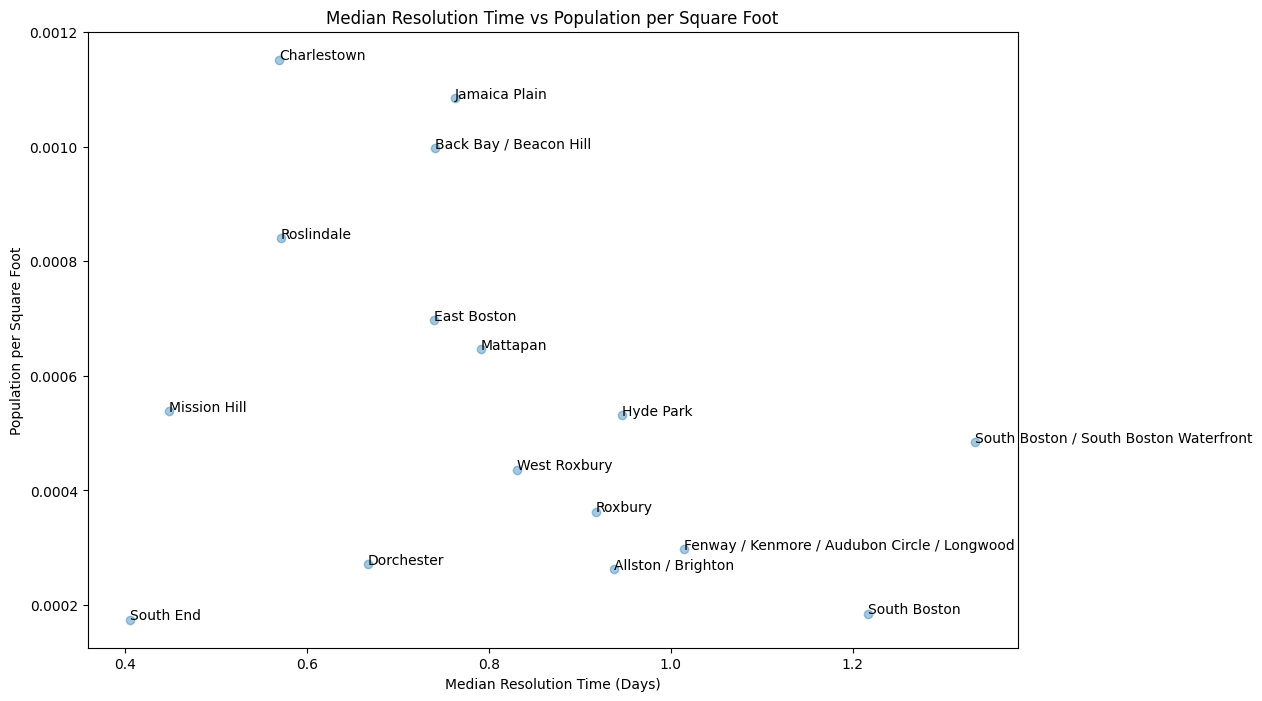

In [132]:
y = df_copy.groupby('neighborhood')['POP_PER_SQFT'].median()

plot(x,y,'Median Resolution Time (Days)','Population per Square Foot','Median Resolution Time vs Population per Square Foot')

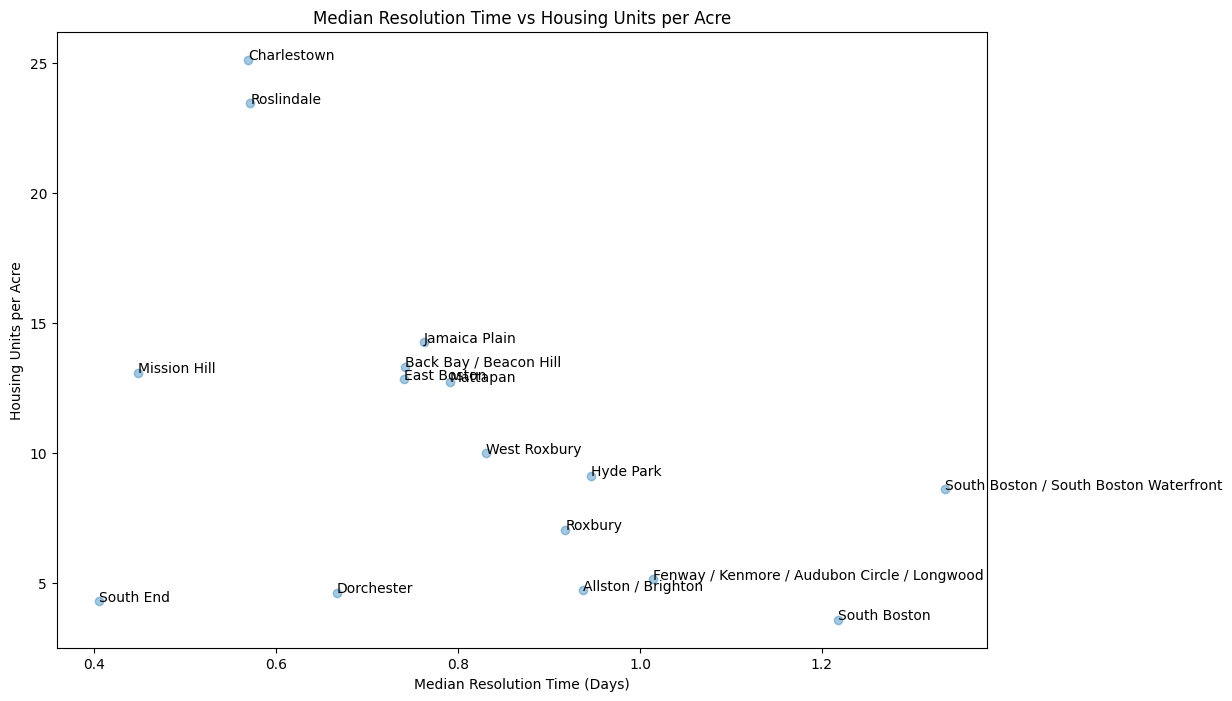

In [133]:
y = df_copy.groupby('neighborhood')['HU_PER_ACRE'].median()
plot(x,y,'Median Resolution Time (Days)','Housing Units per Acre','Median Resolution Time vs Housing Units per Acre')

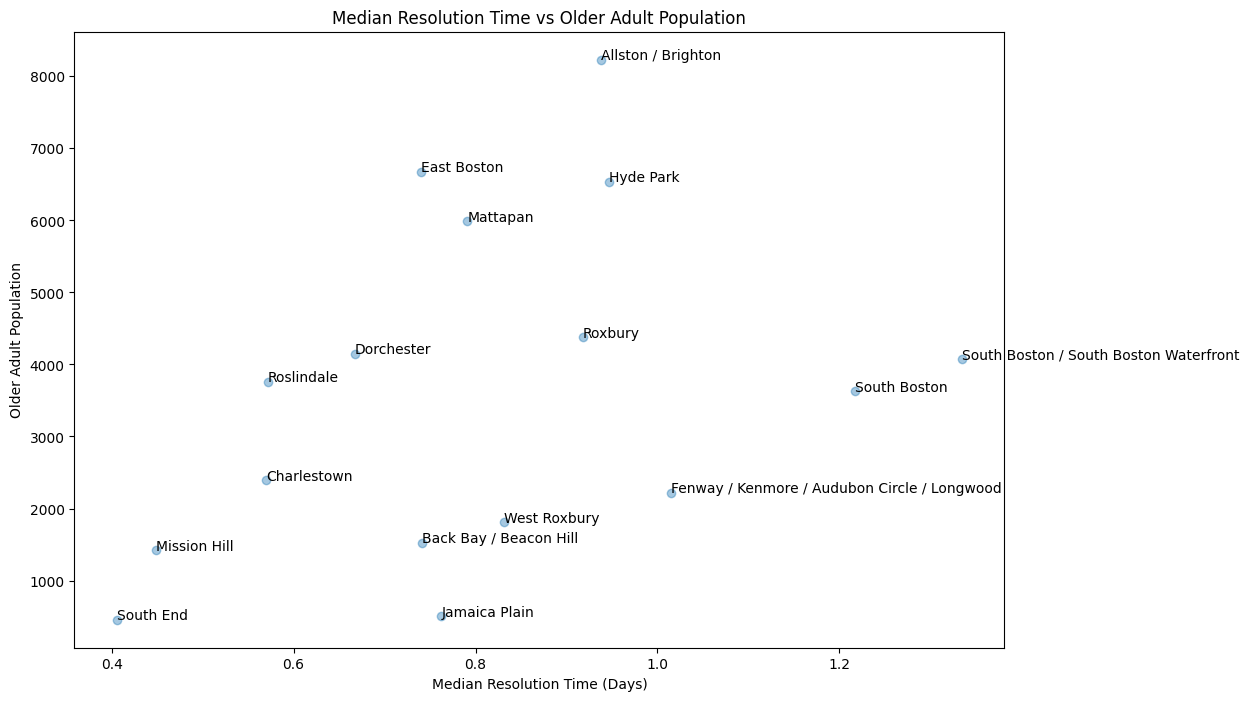

In [134]:
y = df_copy.groupby('neighborhood')['OlderAdult'].median()
plot(x,y,'Median Resolution Time (Days)','Older Adult Population','Median Resolution Time vs Older Adult Population')

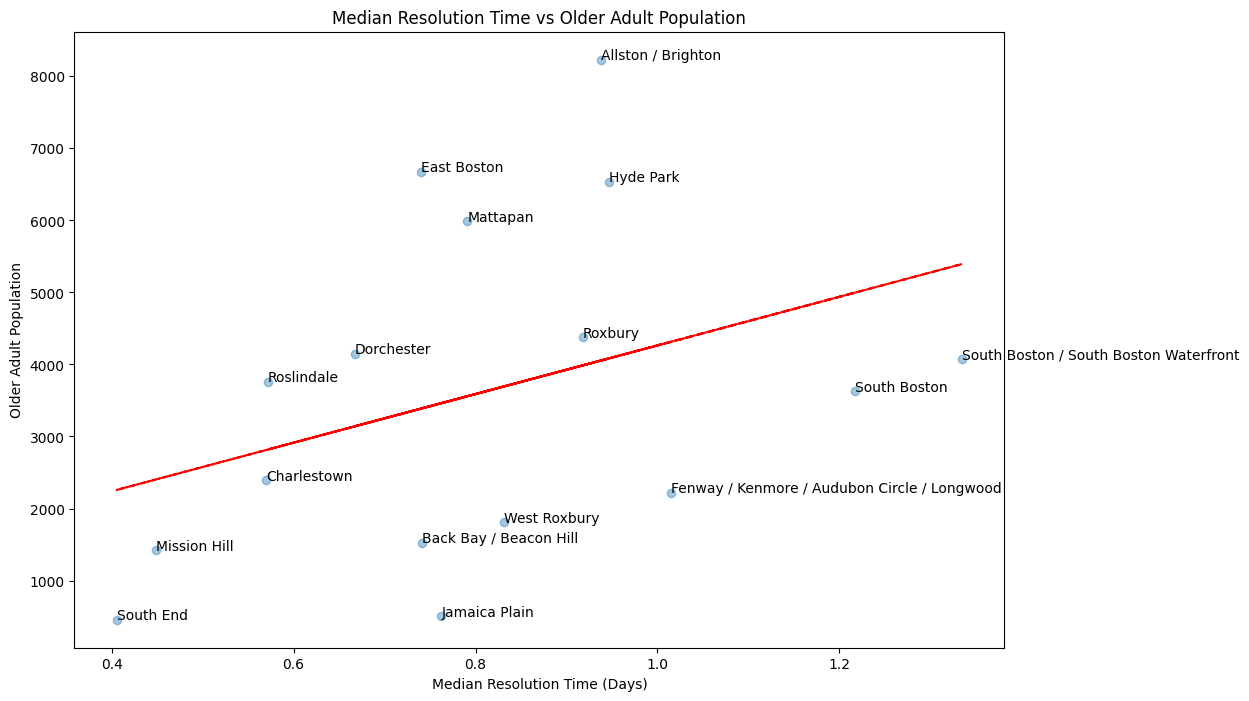

In [135]:
plot_with_lr(x,y,'Median Resolution Time (Days)','Older Adult Population','Median Resolution Time vs Older Adult Population')

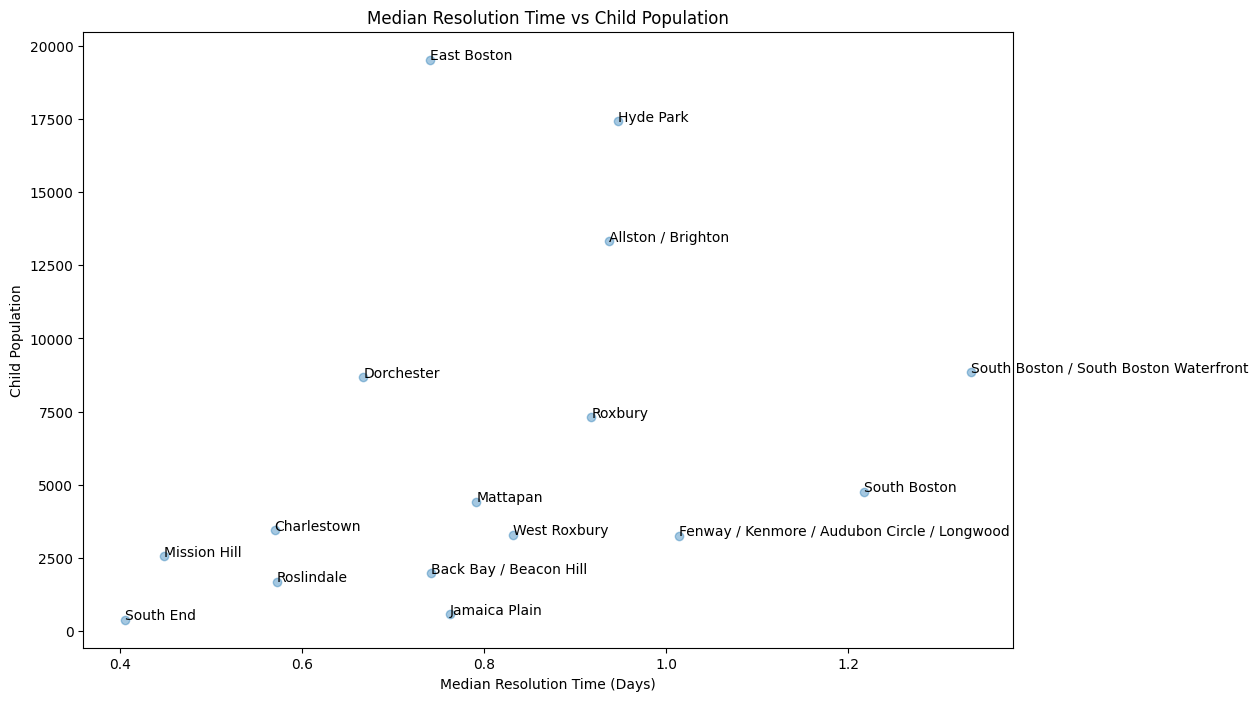

In [136]:
y = df_copy.groupby('neighborhood')['TotChild'].median()
plot(x,y,'Median Resolution Time (Days)','Child Population','Median Resolution Time vs Child Population')

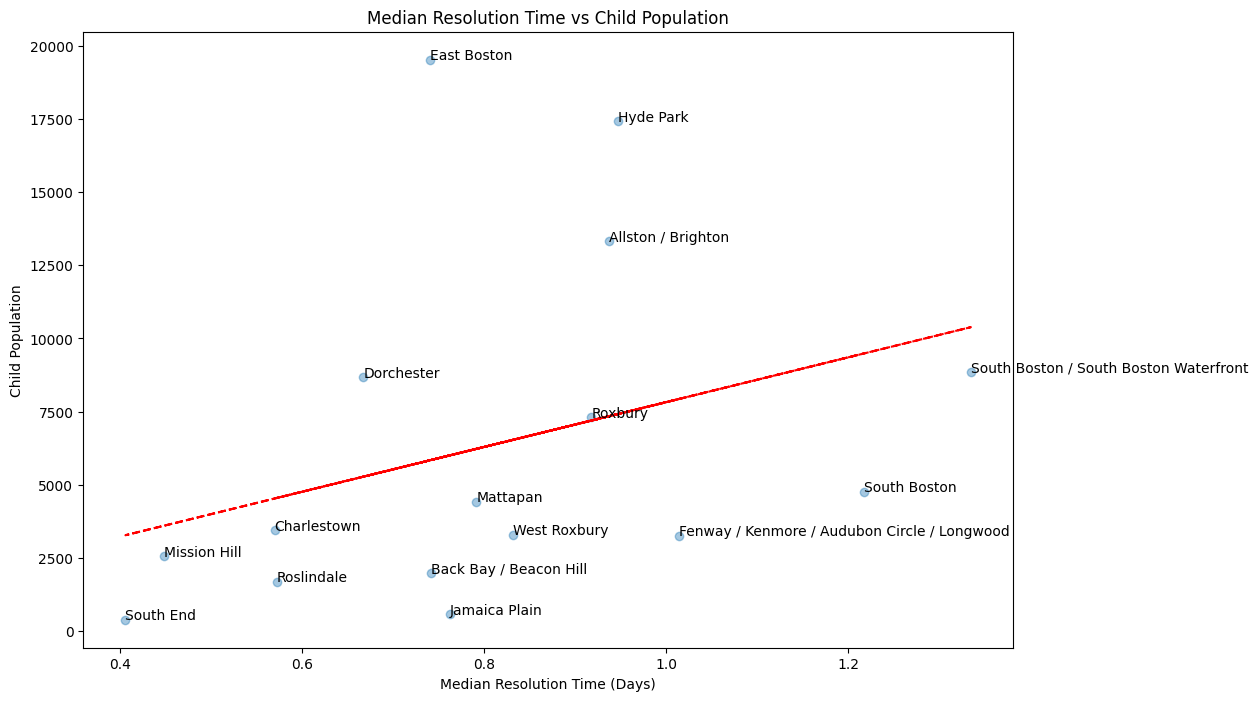

In [137]:
plot_with_lr(x,y,'Median Resolution Time (Days)','Child Population','Median Resolution Time vs Child Population')

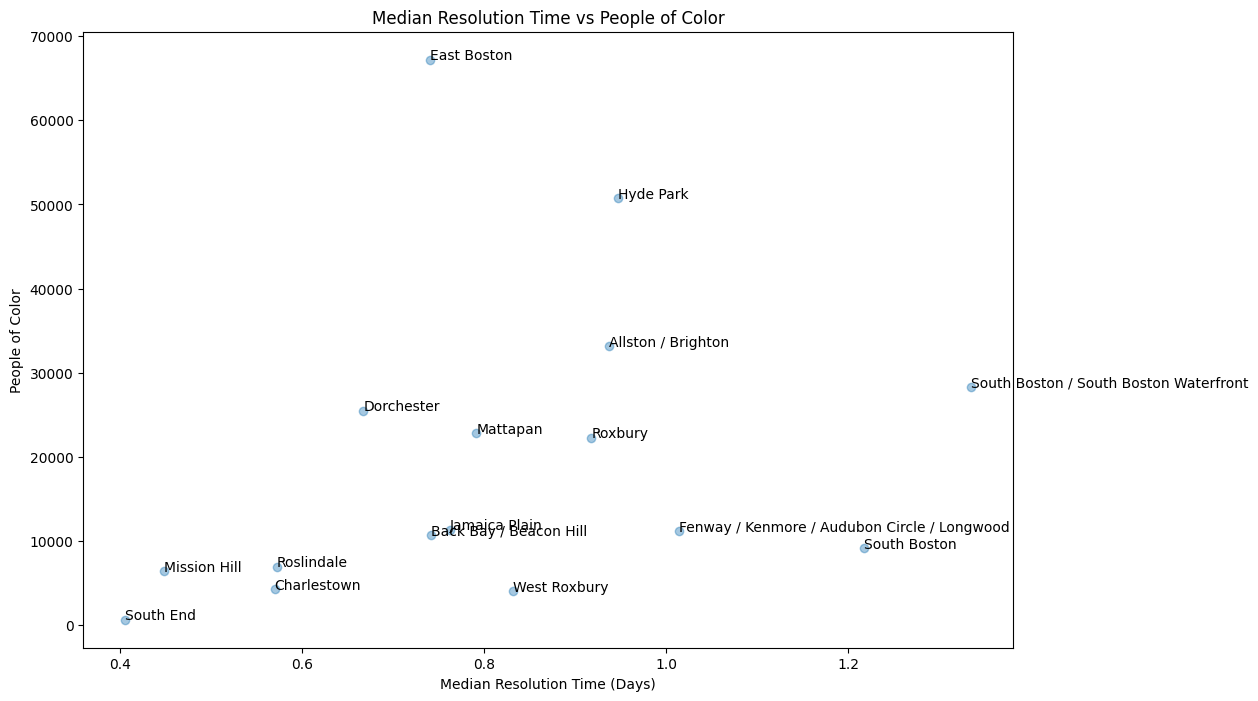

In [138]:
y = df_copy.groupby('neighborhood')['POC2'].median()
plot(x,y,'Median Resolution Time (Days)','People of Color','Median Resolution Time vs People of Color')

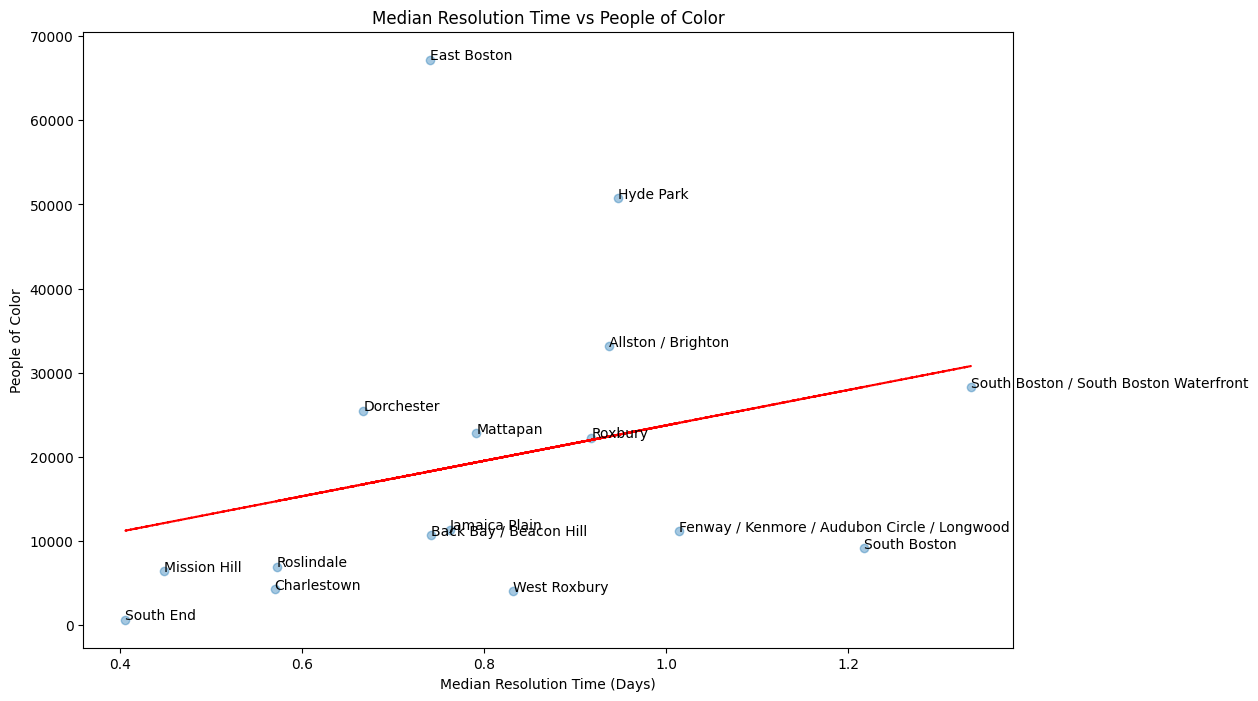

In [139]:
plot_with_lr(x,y,'Median Resolution Time (Days)','People of Color','Median Resolution Time vs People of Color')

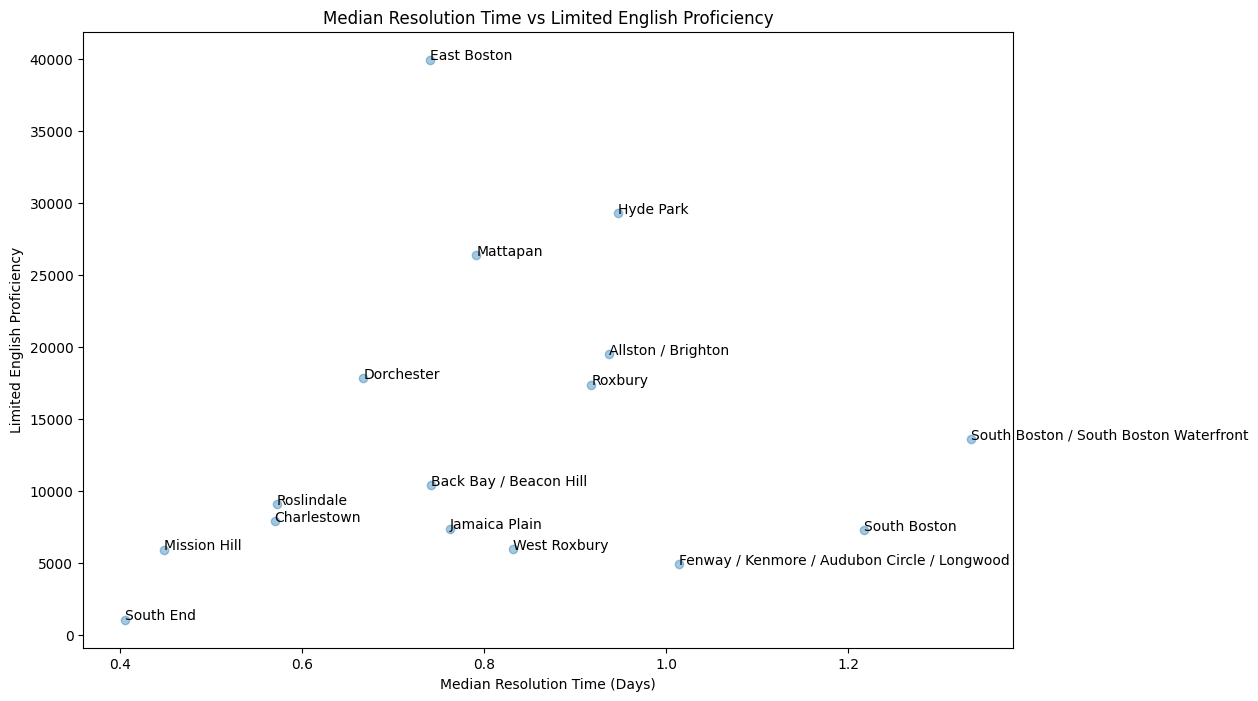

In [140]:
y = df_copy.groupby('neighborhood')['LEP'].median()
plot(x,y,'Median Resolution Time (Days)','Limited English Proficiency','Median Resolution Time vs Limited English Proficiency')

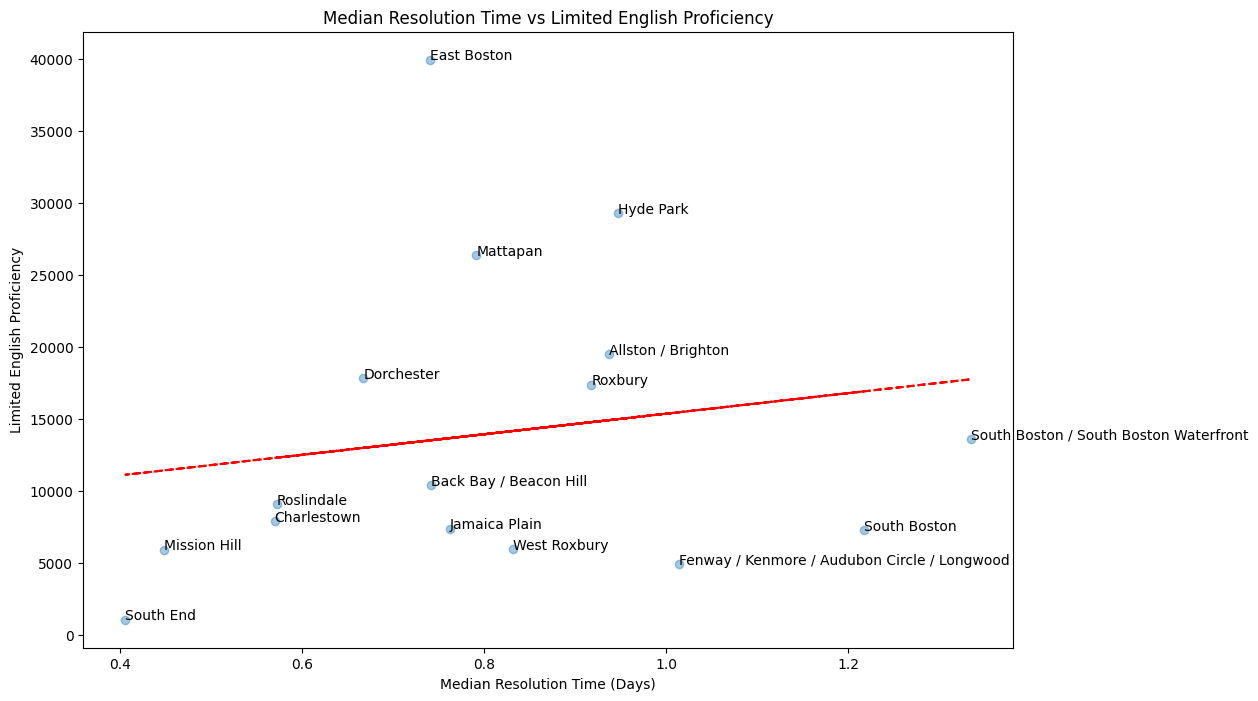

In [141]:
plot_with_lr(x,y,'Median Resolution Time (Days)','Limited English Proficiency','Median Resolution Time vs Limited English Proficiency')

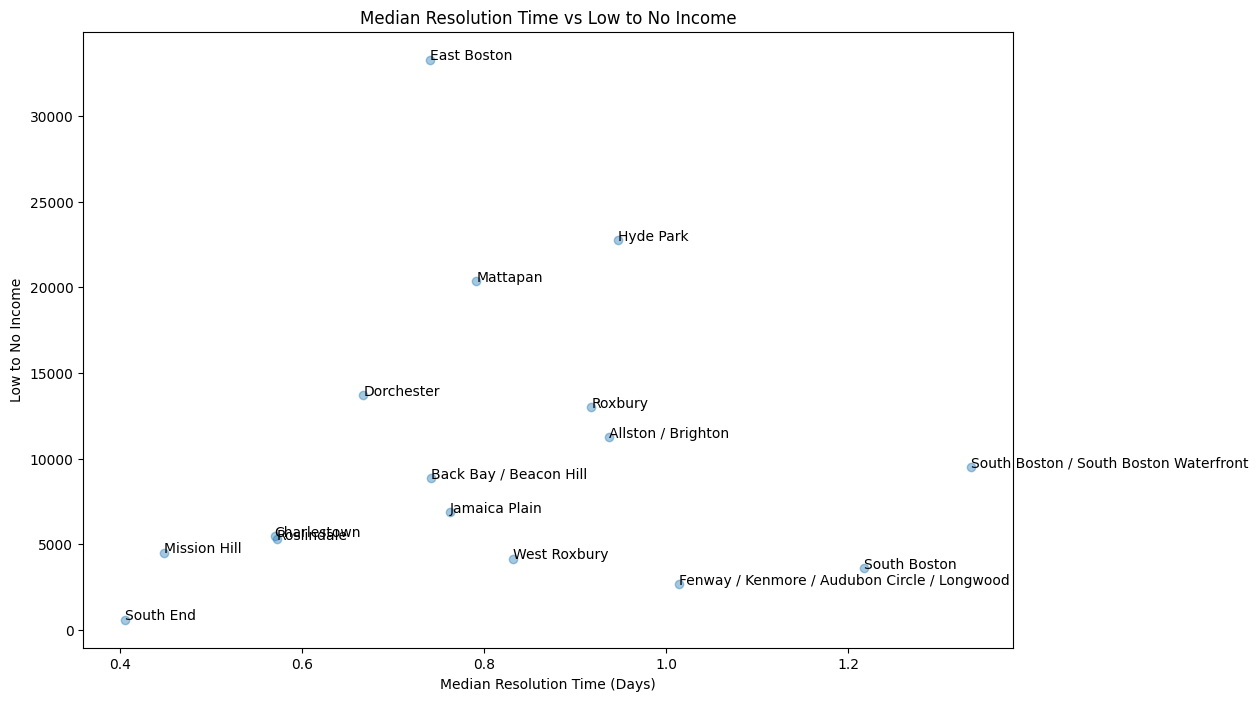

In [142]:
y = df_copy.groupby('neighborhood')['Low_to_No'].median()
plot(x,y,'Median Resolution Time (Days)','Low to No Income','Median Resolution Time vs Low to No Income')

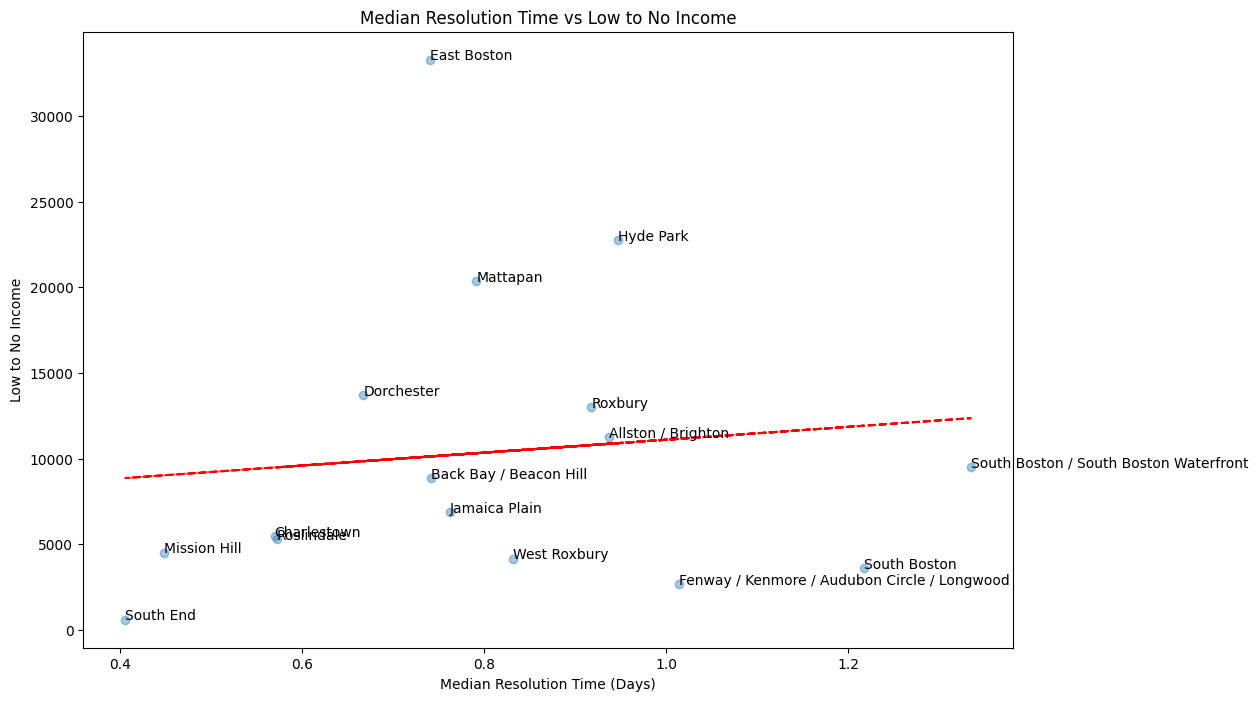

In [144]:
plot_with_lr(x,y,'Median Resolution Time (Days)','Low to No Income','Median Resolution Time vs Low to No Income')

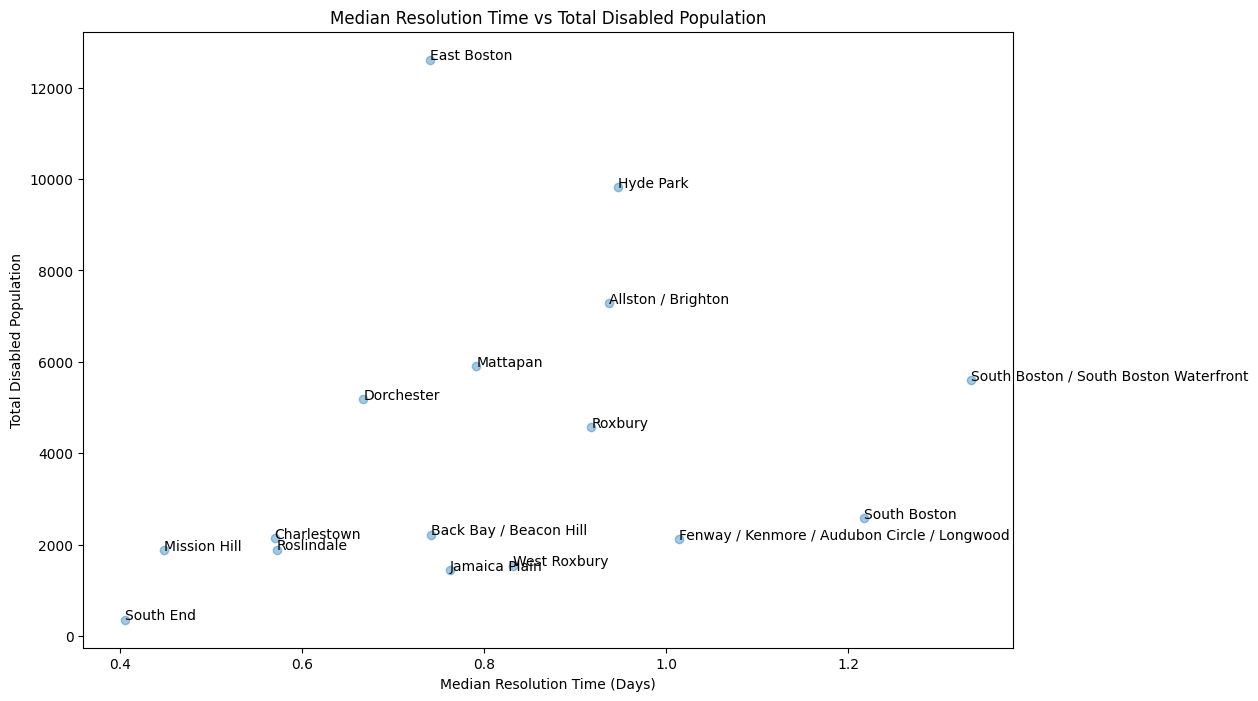

In [145]:
y = df_copy.groupby('neighborhood')['TotDis'].median()
plot(x,y,'Median Resolution Time (Days)','Total Disabled Population','Median Resolution Time vs Total Disabled Population')

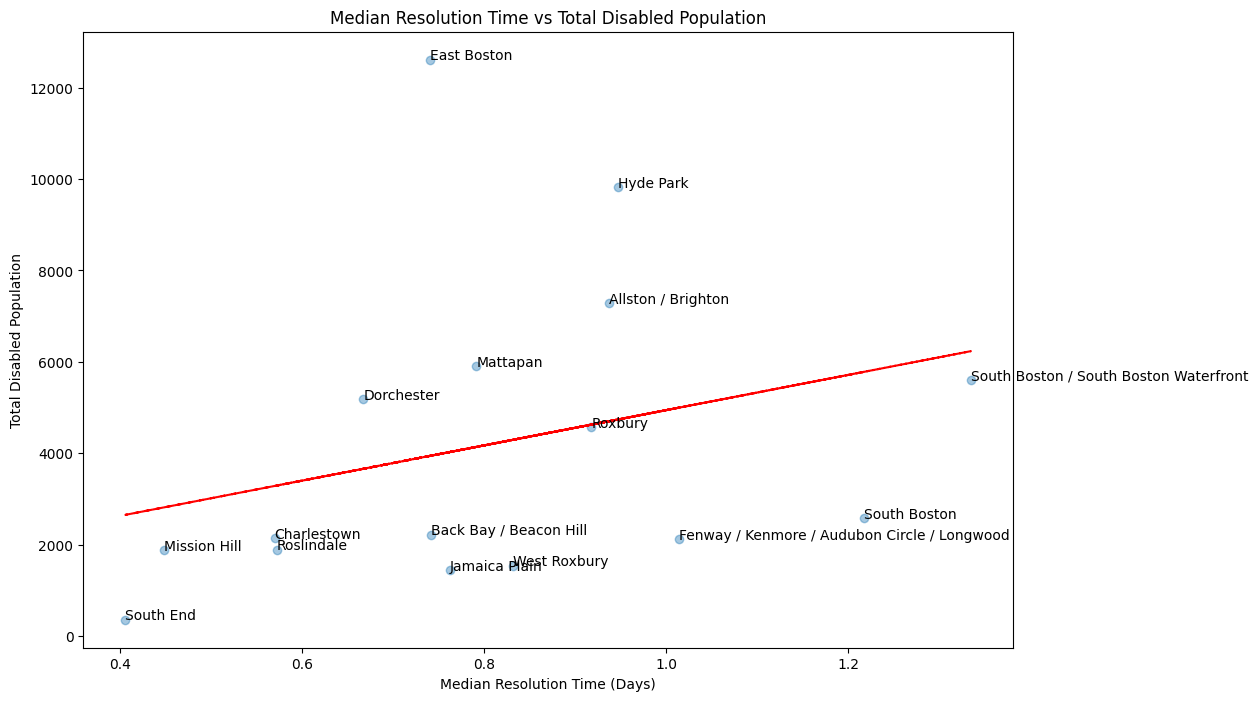

In [146]:
plot_with_lr(x,y,'Median Resolution Time (Days)','Total Disabled Population','Median Resolution Time vs Total Disabled Population')

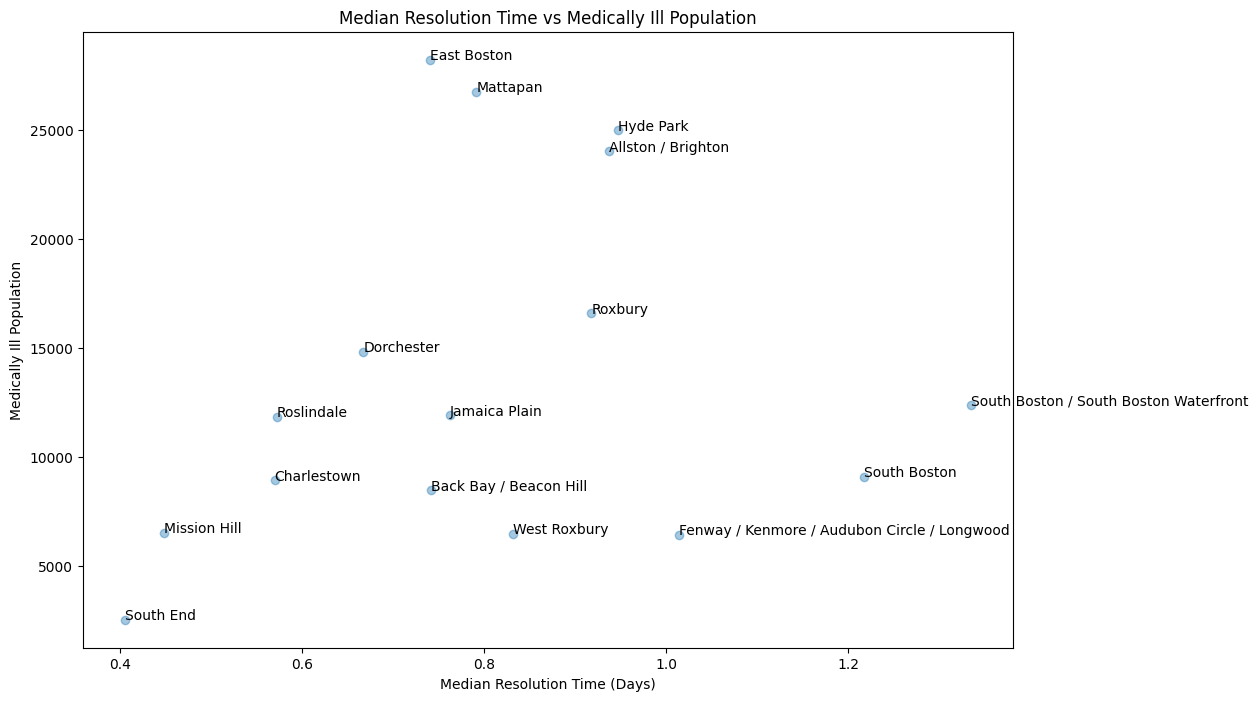

In [147]:
y = df_copy.groupby('neighborhood')['MedIllnes'].median()
plot(x,y,'Median Resolution Time (Days)','Medically Ill Population','Median Resolution Time vs Medically Ill Population')

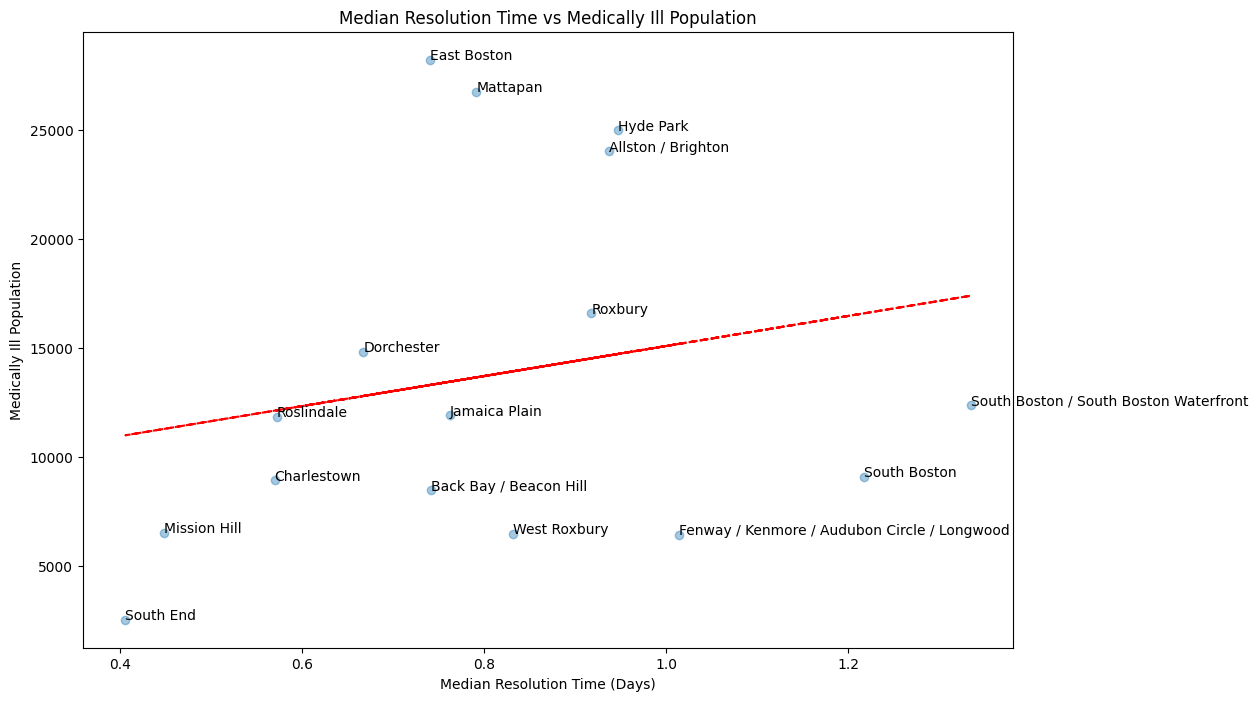

In [148]:
plot_with_lr(x,y,'Median Resolution Time (Days)','Medically Ill Population','Median Resolution Time vs Medically Ill Population')

In [162]:
# take all these features we just plotted, normalize, and scatter plot against resolution time
# points with same neighborhood will be the same color
# plot the linear regression line for each feature

# normalize
max_adult = df_copy['OlderAdult'].max()
max_child = df_copy['TotChild'].max()
max_poc = df_copy['POC2'].max()
max_lep = df_copy['LEP'].max()
max_income = df_copy['Low_to_No'].max()
max_dis = df_copy['TotDis'].max()
max_ill = df_copy['MedIllnes'].max()

min_adult = df_copy['OlderAdult'].min()
min_child = df_copy['TotChild'].min()
min_poc = df_copy['POC2'].min()
min_lep = df_copy['LEP'].min()
min_income = df_copy['Low_to_No'].min()
min_dis = df_copy['TotDis'].min()
min_ill = df_copy['MedIllnes'].min()

In [160]:
normalized_copy = df_copy.copy(deep=True)

In [161]:
normalized_copy['OlderAdult'] = (normalized_copy['OlderAdult'] - min_adult) / (max_adult - min_adult)
normalized_copy['TotChild'] = (normalized_copy['TotChild'] - min_child) / (max_child - min_child)
normalized_copy['POC2'] = (normalized_copy['POC2'] - min_poc) / (max_poc - min_poc)
normalized_copy['LEP'] = (normalized_copy['LEP'] - min_lep) / (max_lep - min_lep)
normalized_copy['Low_to_No'] = (normalized_copy['Low_to_No'] - min_income) / (max_income - min_income)
normalized_copy['TotDis'] = (normalized_copy['TotDis'] - min_dis) / (max_dis - min_dis)
normalized_copy['MedIllnes'] = (normalized_copy['MedIllnes'] - min_ill) / (max_ill - min_ill)

normalized_copy.head()

,case_enquiry_id,open_dt,closed_dt,on_time,case_status,closure_reason,subject,reason,type,queue,department,fire_district,pwd_district,city_council_district,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_zipcode,latitude,longitude,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP_PER_SQFT,HU_PER_ACRE
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,ONTIME,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,8,07,3,B3,Mattapan,7,Ward 17,1714,2126,42.27,-71.08,Employee Generated,0.15,2011,6,30,21,32,3,181,2,68349210.47,1569.08,33103,13517,0.43,0.44,0.47,0.27,0.32,0.42,0.38,11607701.07,48622.47,0.00,8.61
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,12,06,5,E5,Roslindale,10,Ward 20,2008,2131,42.28,-71.14,Self Service,0.16,2011,6,30,22,18,3,181,2,232257149.06,5331.89,60973,25153,0.57,0.68,1.00,0.33,0.47,0.49,0.84,39447500.43,136415.60,0.00,4.72
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,-1,06,6,E5,West Roxbury,12,Ward 20,2017,2132,42.30,-71.17,Self Service,31.54,2011,6,30,22,28,3,181,2,123894262.72,2844.22,22952,10180,0.18,0.23,0.41,0.09,0.16,0.13,0.26,21037074.21,52799.51,0.00,3.58
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,12,08,5,E18,Hyde Park,10,Ward 18,1816,2136,42.25,-71.12,Self Service,21.55,2011,6,30,23,3,3,181,2,55832348.20,1281.73,16585,6592,0.14,0.15,0.23,0.06,0.10,0.16,0.15,9473515.59,33527.34,0.00,5.14
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,ONTIME,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,7,03,3,C11,Dorchester,7,Ward 13,1309,2125,42.31,-71.06,Constituent Call,0.13,2011,6,30,23,12,3,181,2,131273458.29,3013.62,69695,27507,0.77,0.89,0.78,0.68,0.73,0.75,0.87,22311203.25,115494.08,0.00,9.13


In [163]:
x = normalized_copy.groupby('neighborhood')['resolution_time'].median()

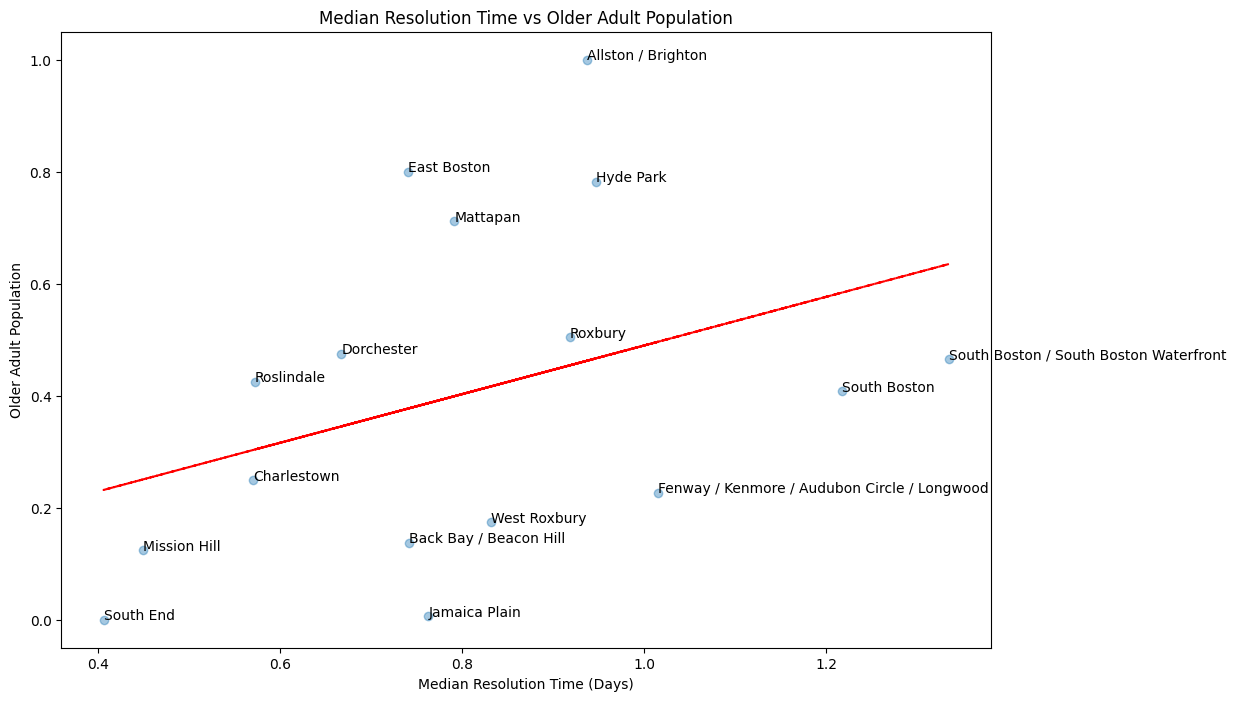

In [164]:
y = normalized_copy.groupby('neighborhood')['OlderAdult'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Older Adult Population','Median Resolution Time vs Older Adult Population')

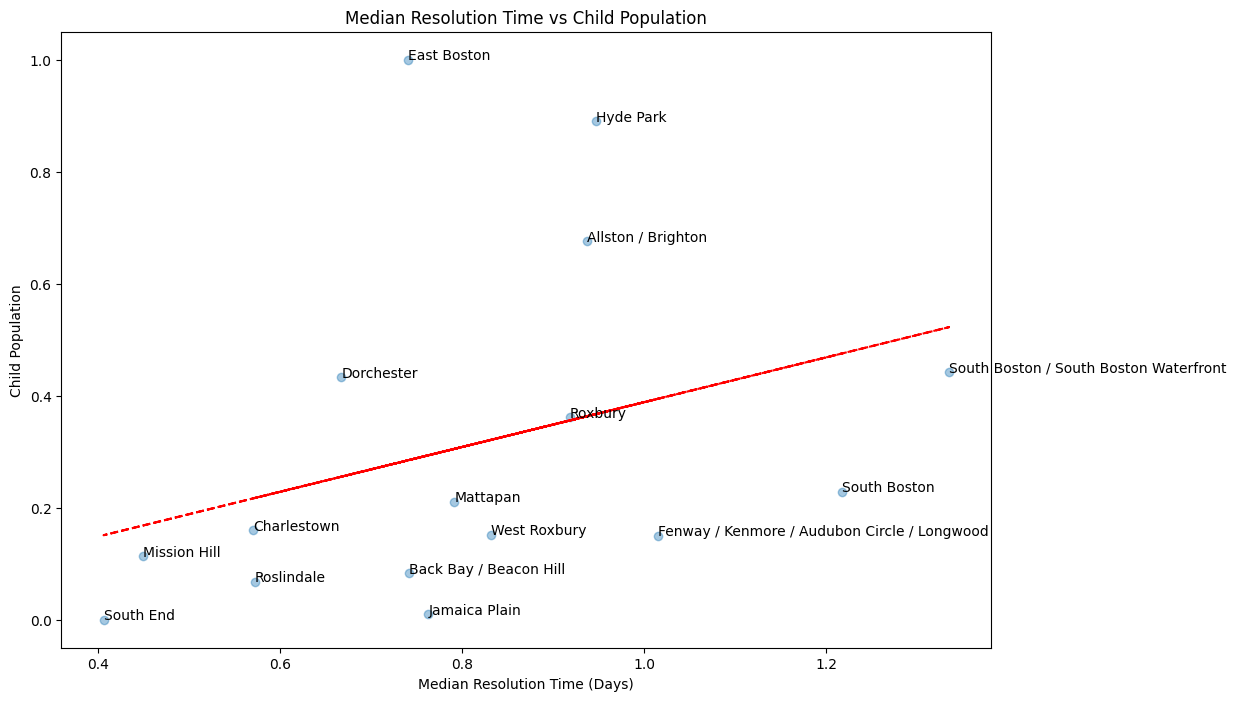

In [165]:
y = normalized_copy.groupby('neighborhood')['TotChild'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Child Population','Median Resolution Time vs Child Population')

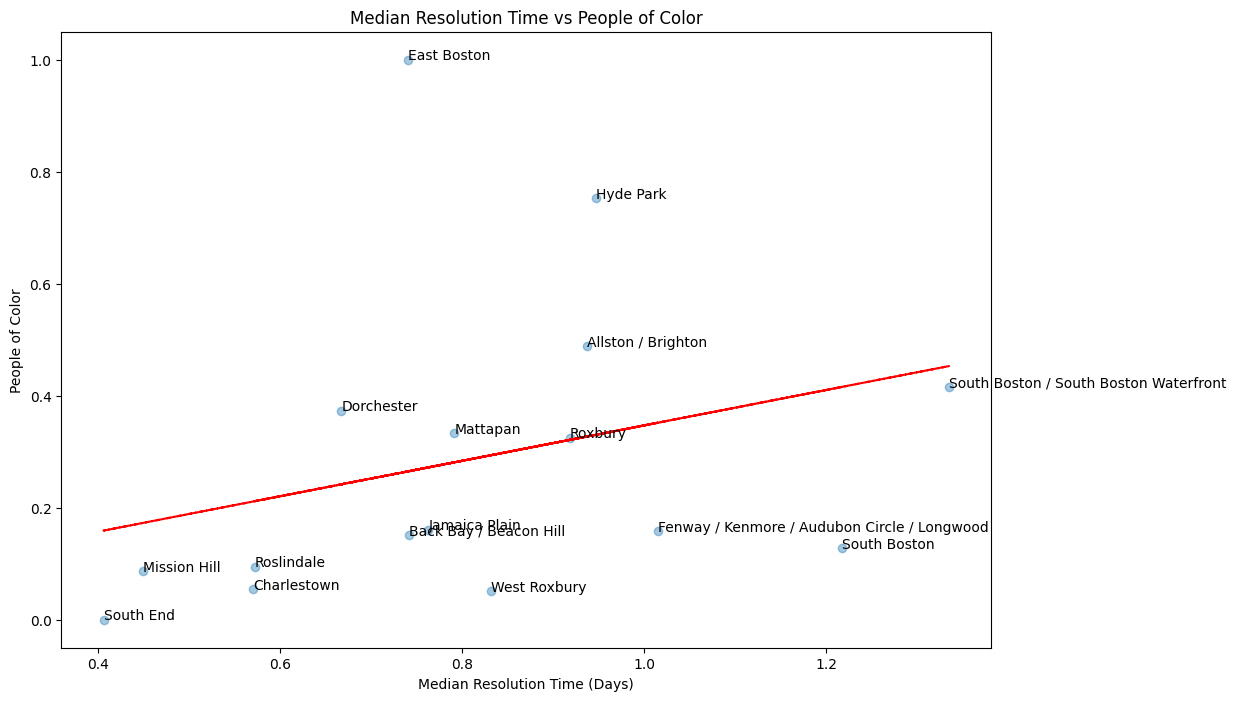

In [166]:
y = normalized_copy.groupby('neighborhood')['POC2'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','People of Color','Median Resolution Time vs People of Color')

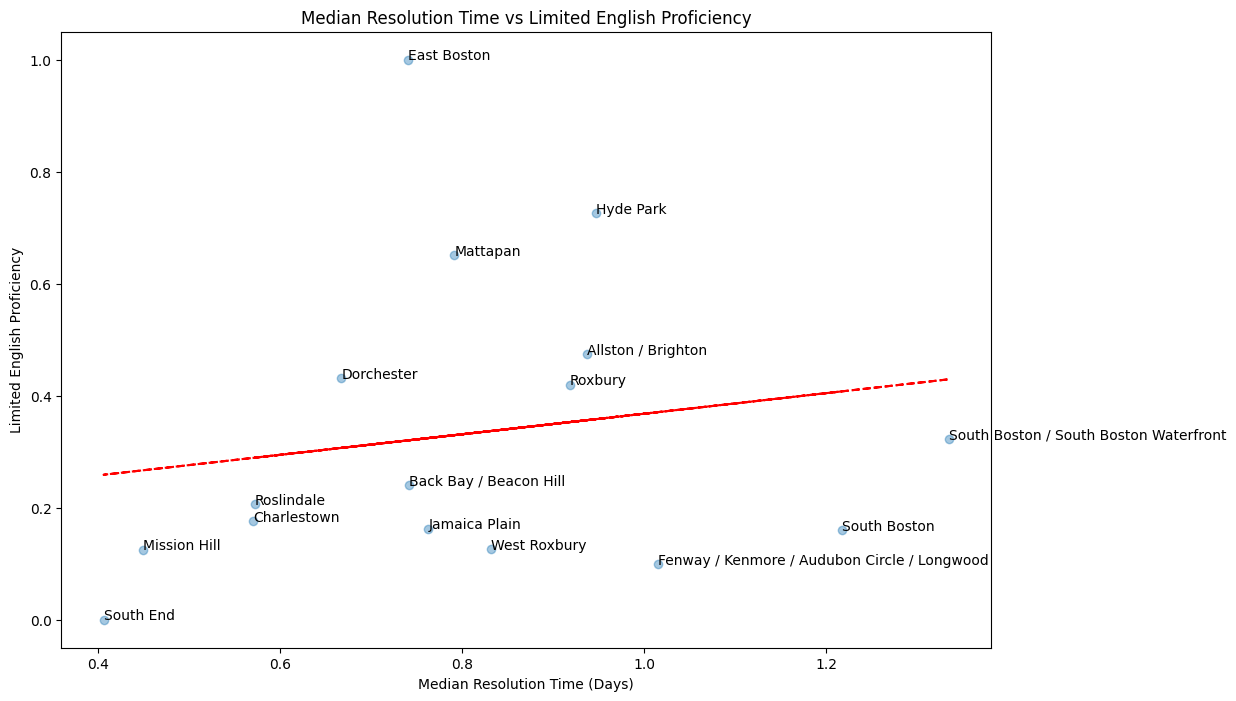

In [167]:
y = normalized_copy.groupby('neighborhood')['LEP'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Limited English Proficiency','Median Resolution Time vs Limited English Proficiency')

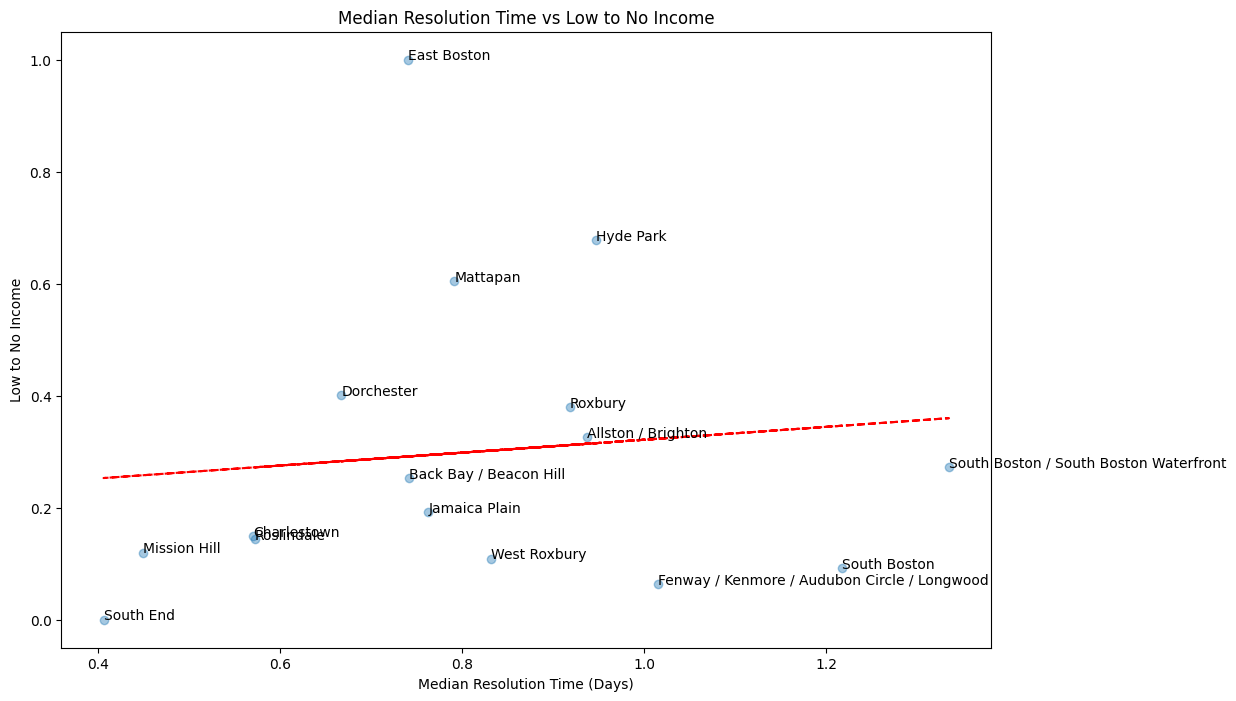

In [168]:
y = normalized_copy.groupby('neighborhood')['Low_to_No'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Low to No Income','Median Resolution Time vs Low to No Income')

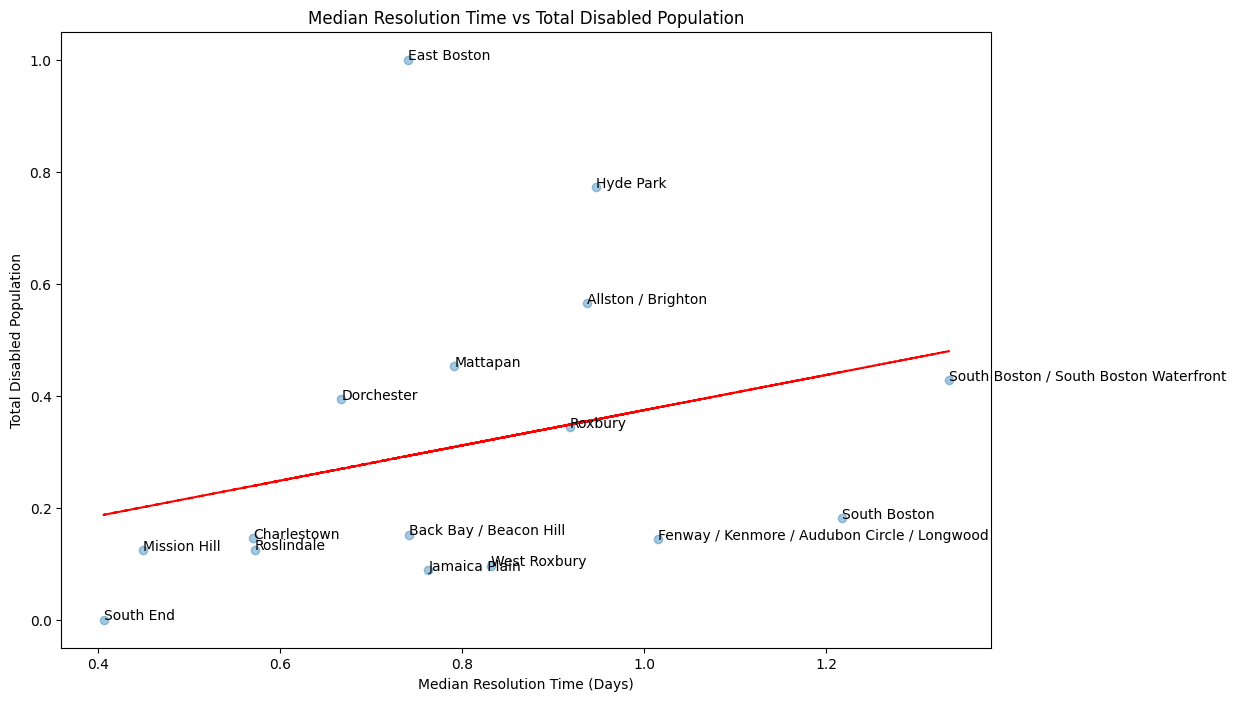

In [169]:
y = normalized_copy.groupby('neighborhood')['TotDis'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Total Disabled Population','Median Resolution Time vs Total Disabled Population')

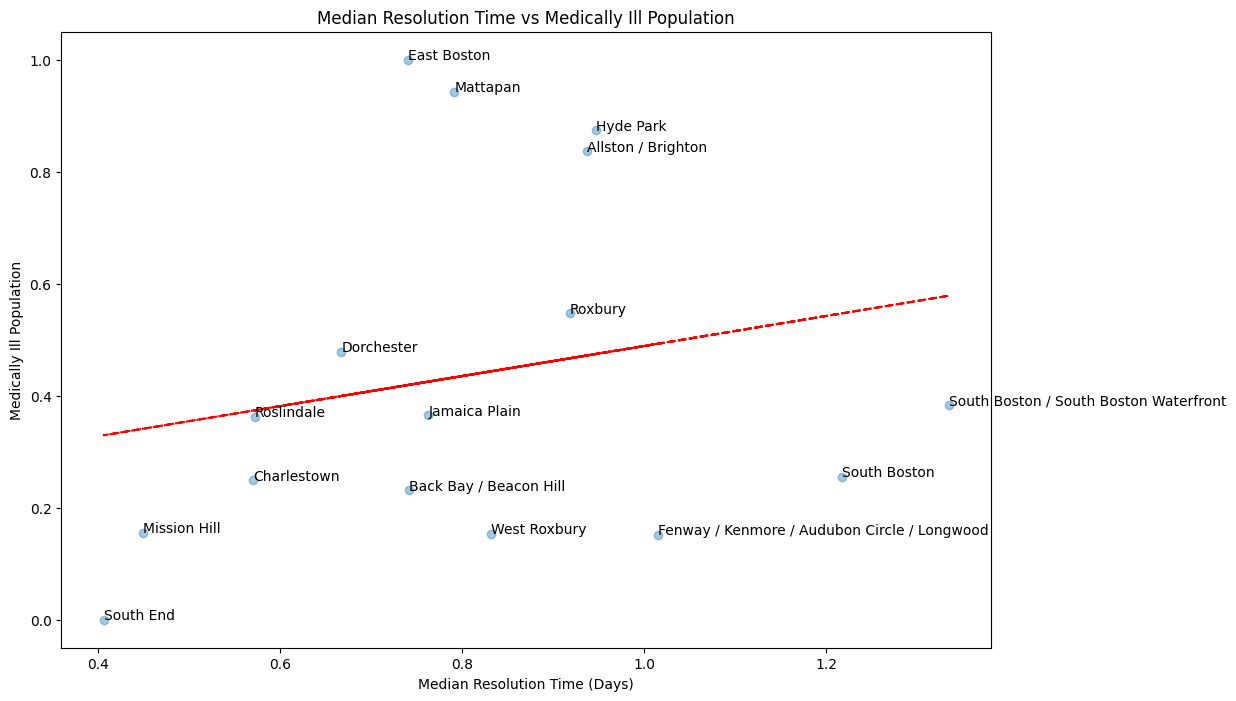

In [170]:
y = normalized_copy.groupby('neighborhood')['MedIllnes'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Medically Ill Population','Median Resolution Time vs Medically Ill Population')

In [171]:
normalize_by_area = df_copy.copy(deep=True)

In [182]:
normalize_by_area['OlderAdult'] = normalize_by_area['OlderAdult'] / normalize_by_area['AREA_SQFT']
normalize_by_area['TotChild'] = normalize_by_area['TotChild'] / normalize_by_area['AREA_SQFT']
normalize_by_area['POC2'] = normalize_by_area['POC2'] / normalize_by_area['AREA_SQFT']
normalize_by_area['LEP'] = normalize_by_area['LEP'] / normalize_by_area['AREA_SQFT']
normalize_by_area['Low_to_No'] = normalize_by_area['Low_to_No'] / normalize_by_area['AREA_SQFT']
normalize_by_area['TotDis'] = normalize_by_area['TotDis'] / normalize_by_area['AREA_SQFT']
normalize_by_area['MedIllnes'] = normalize_by_area['MedIllnes'] / normalize_by_area['AREA_SQFT']
normalize_by_area['POP_PER_SQFT'] = normalize_by_area['POP100_RE'] / normalize_by_area['AREA_SQFT']
normalize_by_area['HU_PER_ACRE'] = normalize_by_area['HU100_RE'] / normalize_by_area['AREA_ACRES']

In [173]:
x = normalize_by_area.groupby('neighborhood')['resolution_time'].median()

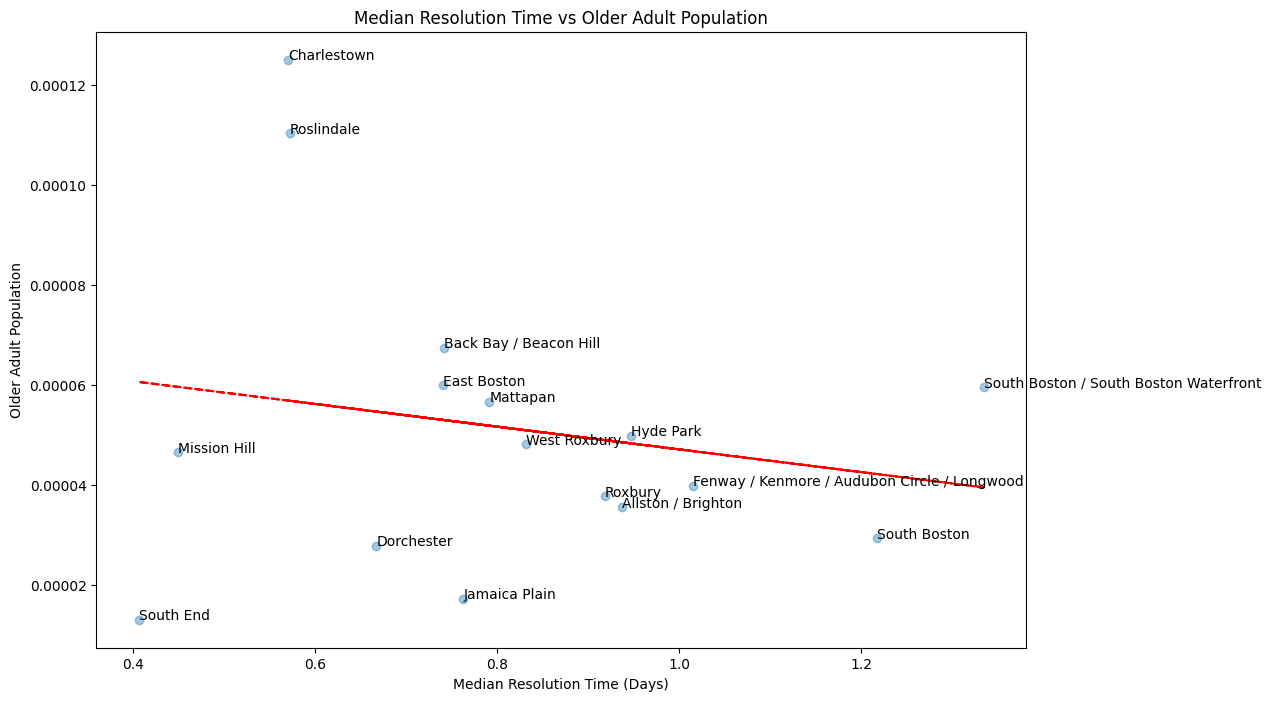

In [174]:
y = normalize_by_area.groupby('neighborhood')['OlderAdult'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Older Adult Population','Median Resolution Time vs Older Adult Population')

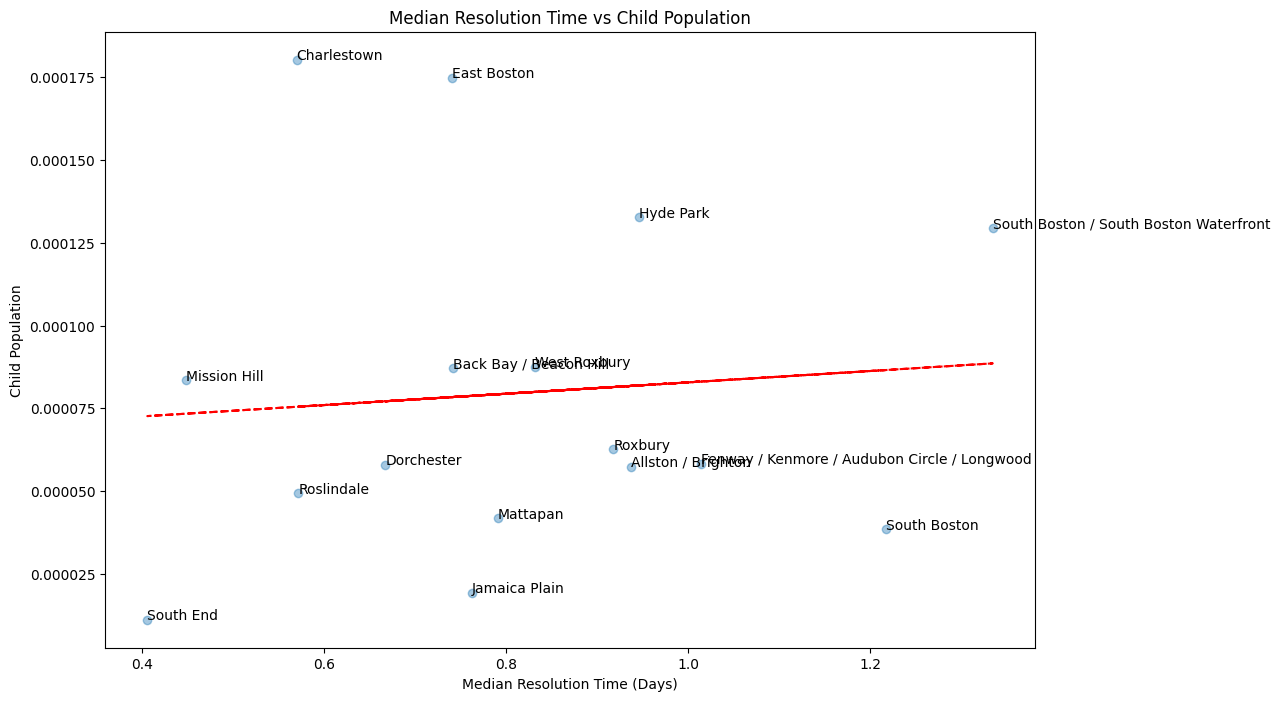

In [175]:
y = normalize_by_area.groupby('neighborhood')['TotChild'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Child Population','Median Resolution Time vs Child Population')


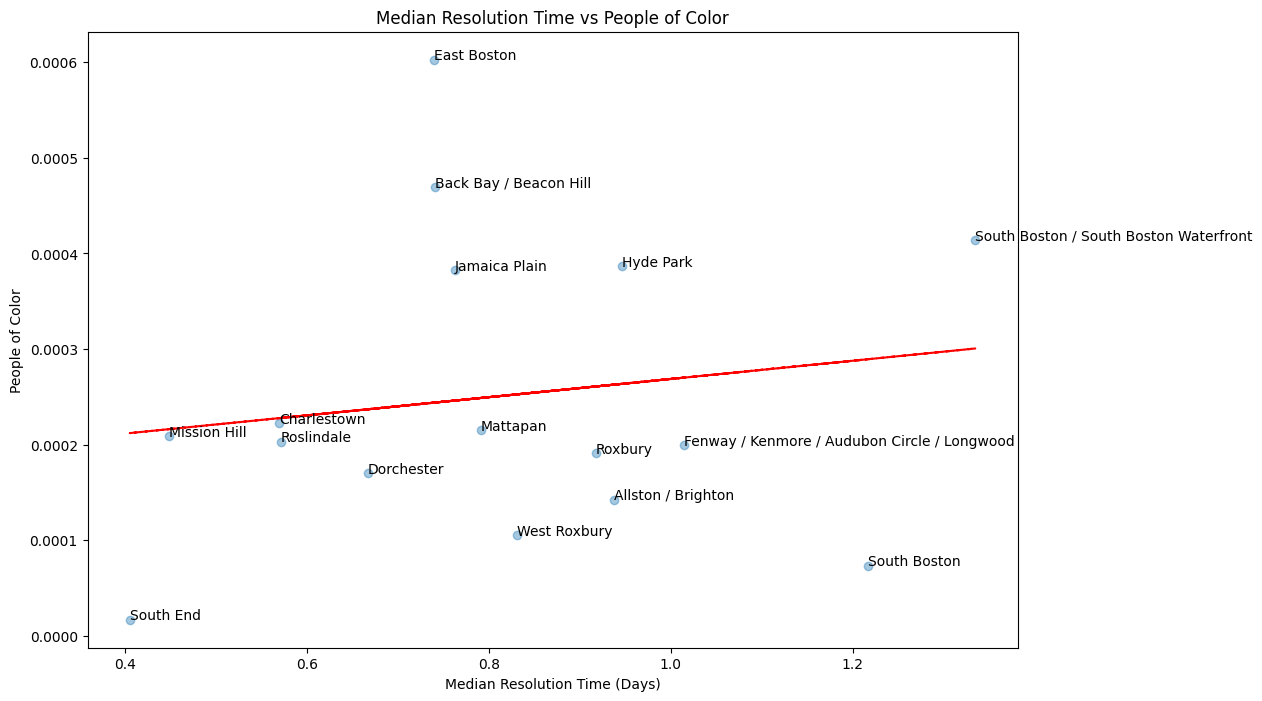

In [177]:
y = normalize_by_area.groupby('neighborhood')['POC2'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','People of Color','Median Resolution Time vs People of Color')

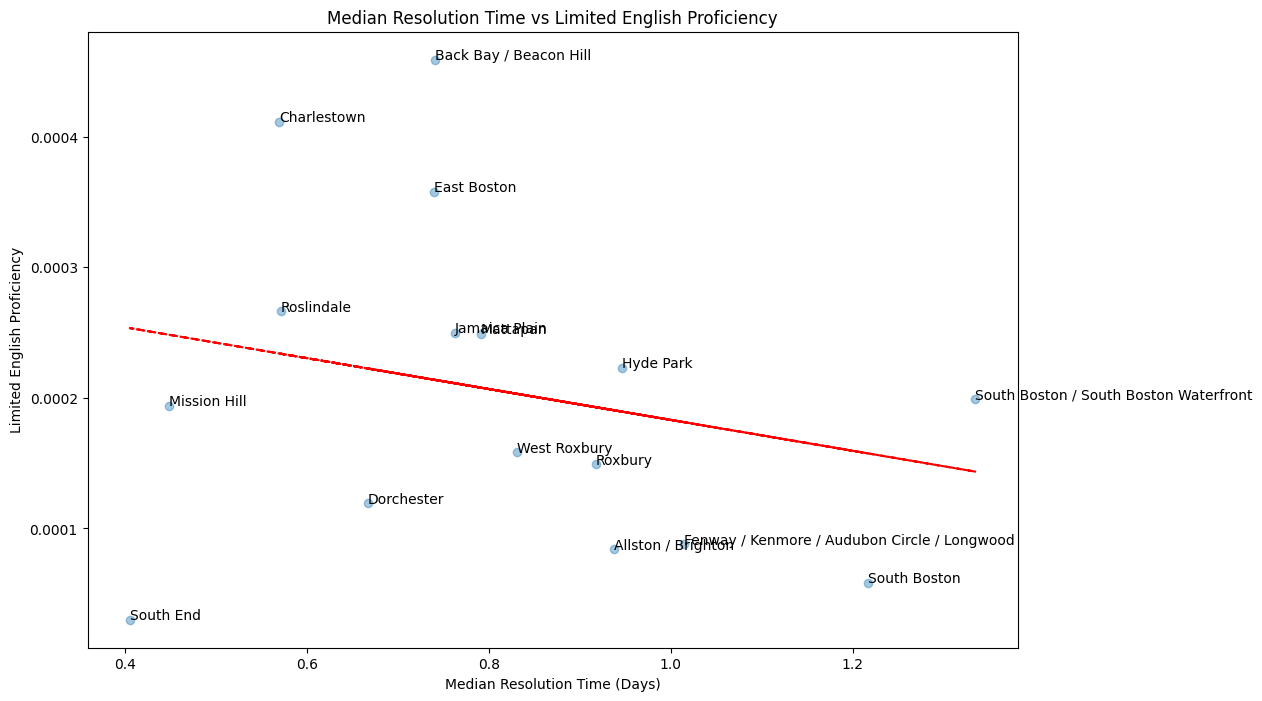

In [178]:
y = normalize_by_area.groupby('neighborhood')['LEP'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Limited English Proficiency','Median Resolution Time vs Limited English Proficiency')

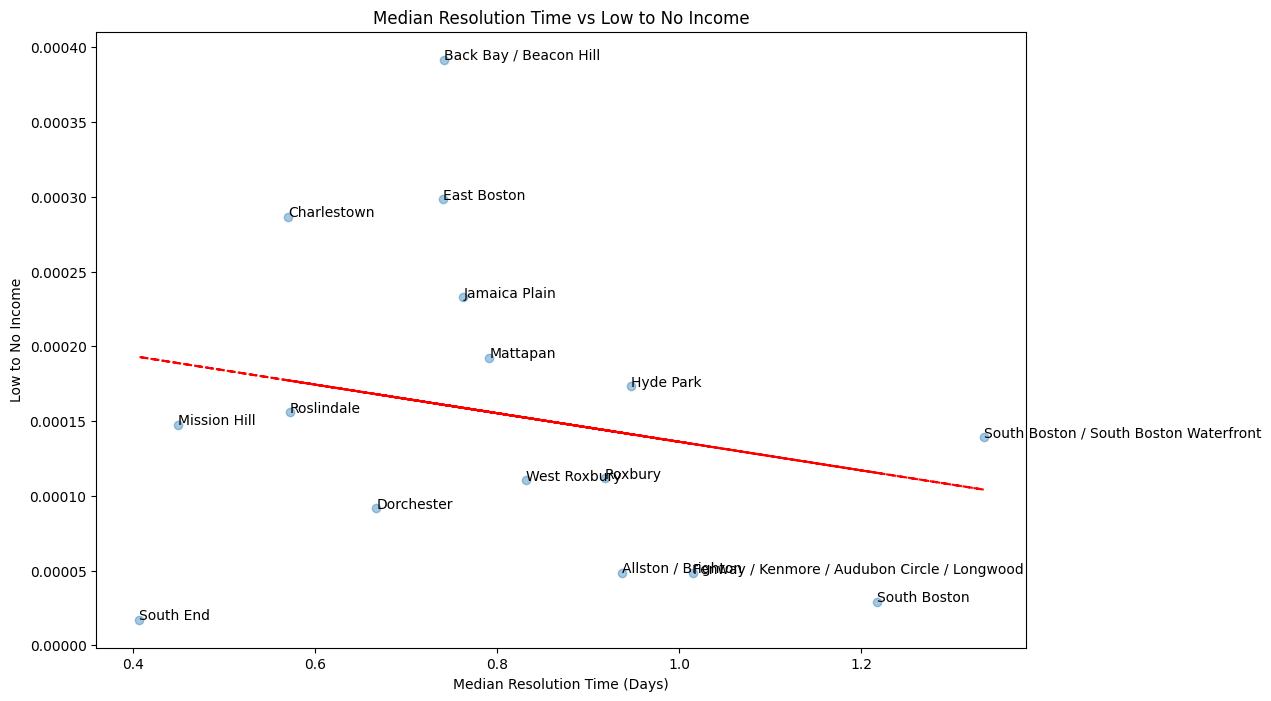

In [179]:
y = normalize_by_area.groupby('neighborhood')['Low_to_No'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Low to No Income','Median Resolution Time vs Low to No Income')

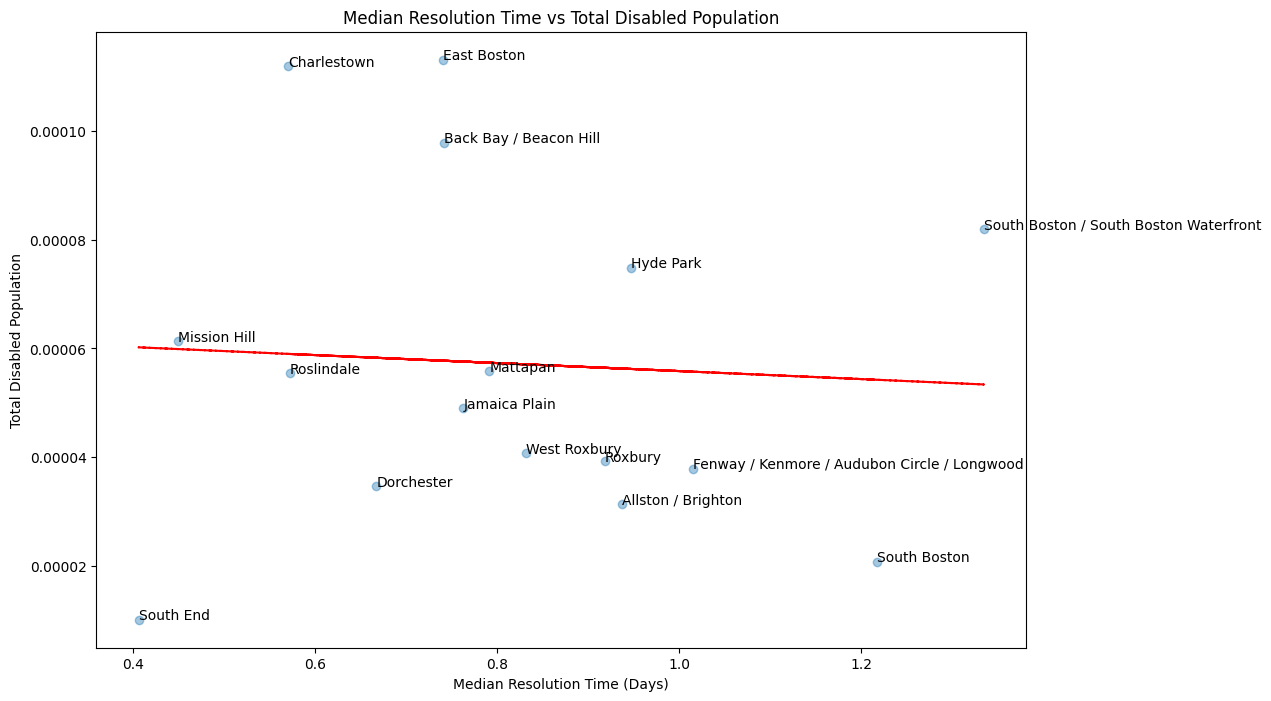

In [180]:
y= normalize_by_area.groupby('neighborhood')['TotDis'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Total Disabled Population','Median Resolution Time vs Total Disabled Population')

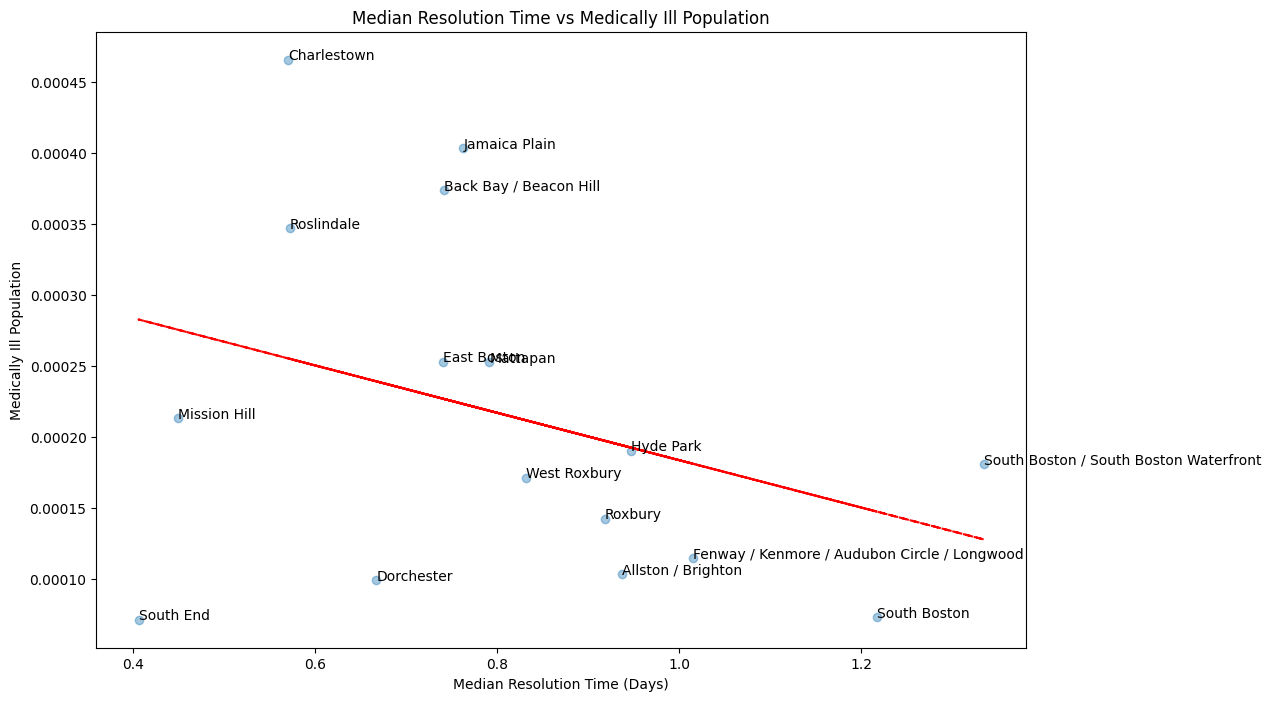

In [181]:
y = normalize_by_area.groupby('neighborhood')['MedIllnes'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Medically Ill Population','Median Resolution Time vs Medically Ill Population')


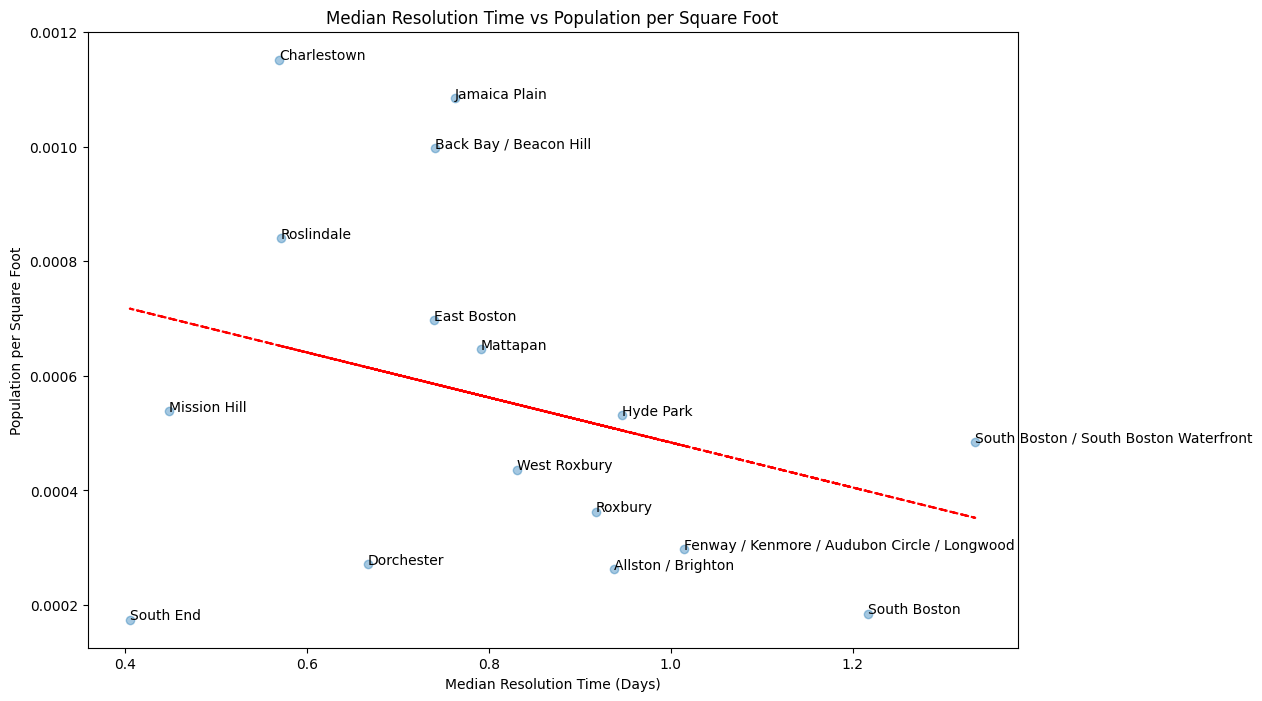

In [183]:
y = normalize_by_area.groupby('neighborhood')['POP_PER_SQFT'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Population per Square Foot','Median Resolution Time vs Population per Square Foot')

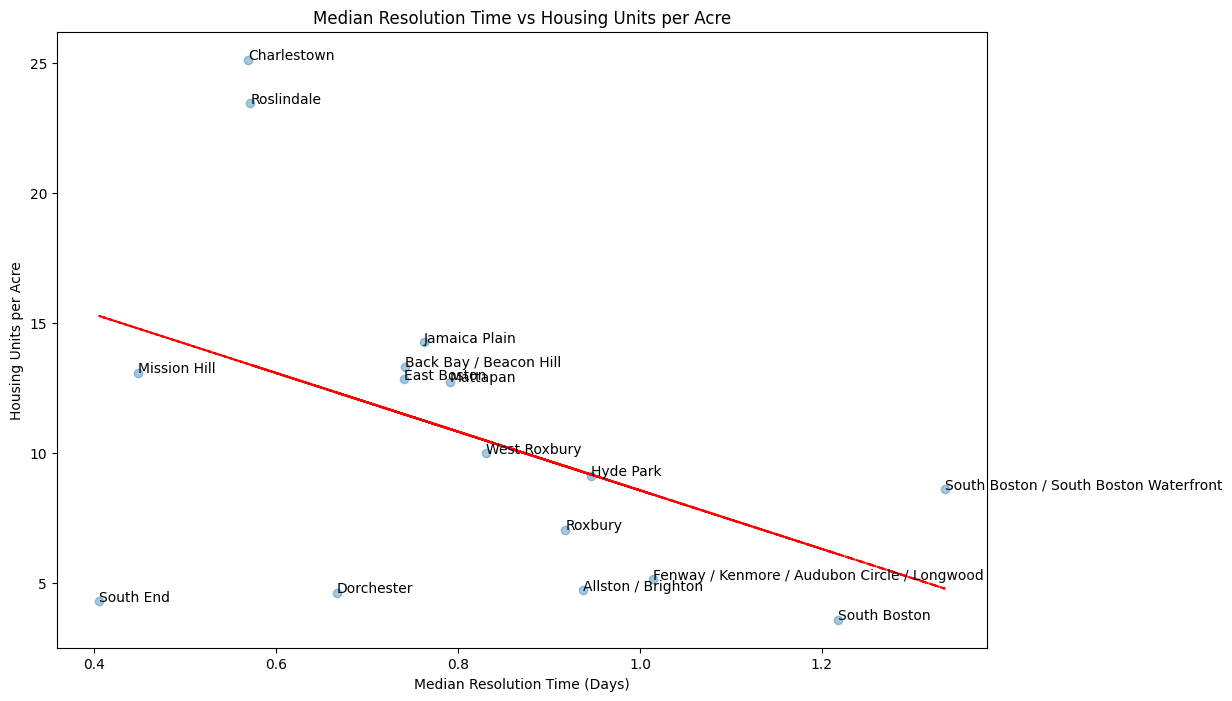

In [184]:
y = normalize_by_area.groupby('neighborhood')['HU_PER_ACRE'].median()
plot_with_lr(x,y,'Median Resolution Time (Days)','Housing Units per Acre','Median Resolution Time vs Housing Units per Acre')

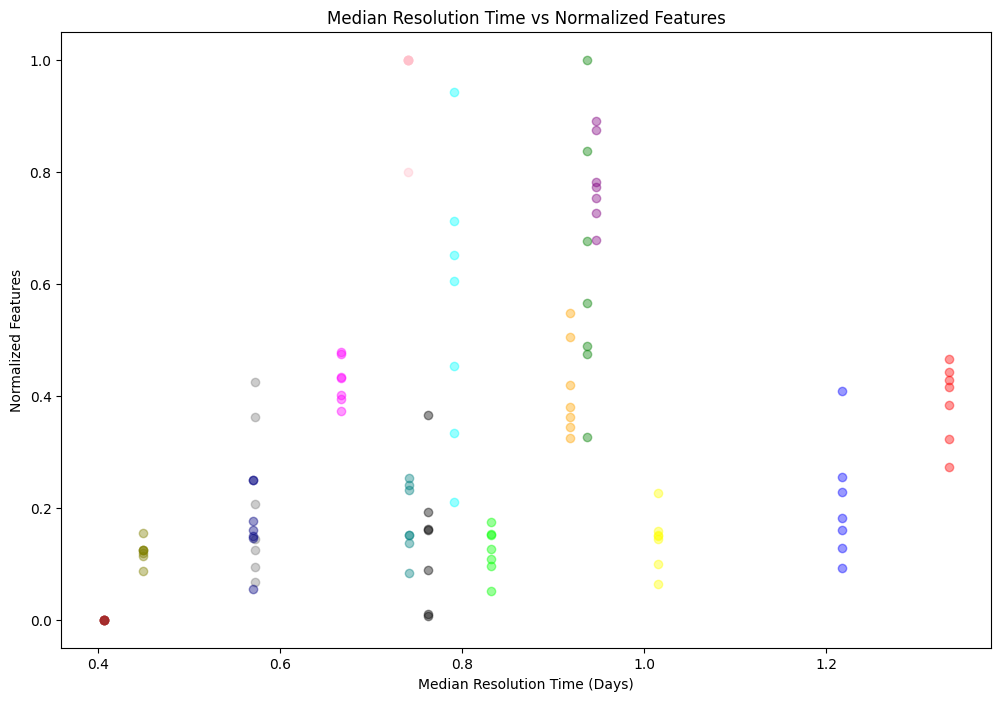

In [186]:
# use normalized_copy for the rest of the analysis
# scatter all of the features against resolution time on the same plot
# color points by neighborhood

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'black', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'lime', 'olive', 'teal', 'navy', 'maroon', 'fuchsia', 'aqua', 'silver']
neighborhoods = normalized_copy.neighborhood.unique()
colors = colors[:len(neighborhoods)]

plt.figure(figsize=(12,8))
plt.title('Median Resolution Time vs Normalized Features')
plt.xlabel('Median Resolution Time (Days)')
plt.ylabel('Normalized Features')

for i, neighborhood in enumerate(neighborhoods):
    x = normalized_copy[normalized_copy.neighborhood == neighborhood].resolution_time.median()
    y = normalized_copy[normalized_copy.neighborhood == neighborhood].OlderAdult.median()
    plt.scatter(x, y, color=colors[i], alpha=0.4)

for i, neighborhood in enumerate(neighborhoods):
    x = normalized_copy[normalized_copy.neighborhood == neighborhood].resolution_time.median()
    y = normalized_copy[normalized_copy.neighborhood == neighborhood].TotChild.median()
    plt.scatter(x, y, color=colors[i], alpha=0.4)

for i, neighborhood in enumerate(neighborhoods):
    x = normalized_copy[normalized_copy.neighborhood == neighborhood].resolution_time.median()
    y = normalized_copy[normalized_copy.neighborhood == neighborhood].POC2.median()
    plt.scatter(x, y, color=colors[i], alpha=0.4)

for i, neighborhood in enumerate(neighborhoods):
    x = normalized_copy[normalized_copy.neighborhood == neighborhood].resolution_time.median()
    y = normalized_copy[normalized_copy.neighborhood == neighborhood].LEP.median()
    plt.scatter(x, y, color=colors[i], alpha=0.4)

for i, neighborhood in enumerate(neighborhoods):
    x = normalized_copy[normalized_copy.neighborhood == neighborhood].resolution_time.median()
    y = normalized_copy[normalized_copy.neighborhood == neighborhood].Low_to_No.median()
    plt.scatter(x, y, color=colors[i], alpha=0.4)

for i, neighborhood in enumerate(neighborhoods):
    x = normalized_copy[normalized_copy.neighborhood == neighborhood].resolution_time.median()
    y = normalized_copy[normalized_copy.neighborhood == neighborhood].TotDis.median()
    plt.scatter(x, y, color=colors[i], alpha=0.4)

for i, neighborhood in enumerate(neighborhoods):
    x = normalized_copy[normalized_copy.neighborhood == neighborhood].resolution_time.median()
    y = normalized_copy[normalized_copy.neighborhood == neighborhood].MedIllnes.median()
    plt.scatter(x, y, color=colors[i], alpha=0.4)

plt.show()
